## Group No 38

## Group Member Names:
1. SHYAMALA GOWRI V.G 2020SC04959
2. SAYANTANI GUPTA    2020SC04911
3.  G.VARADARAJAN     2020SC04812



# 1. Business Understanding

Now a days we see that there are mutliple vendors where they sellt the cars of different brands of used cars. The used cars are on demand , like ola ,cardekho many online retailers have been selling the cars. Here we want to understand how the agencies are pricing the car of the used car. We are getting the data from the website  of https://www.cardekho.com/ . To analyze the data we are using available various visualization plots to understand the behavior of the data.
  Data Understanding - Collecting initial data from Website (Data scraping) , explore and verify the data
     

1.   - Data Conversion
     -  Data Reorganization and Data Preparation
     -  Data Cleaning and construction
     - Data Modeling (selecting model techniques / features and building models)
     - Model Evalution and Deployment


      
      


# 2. Data Acquisition

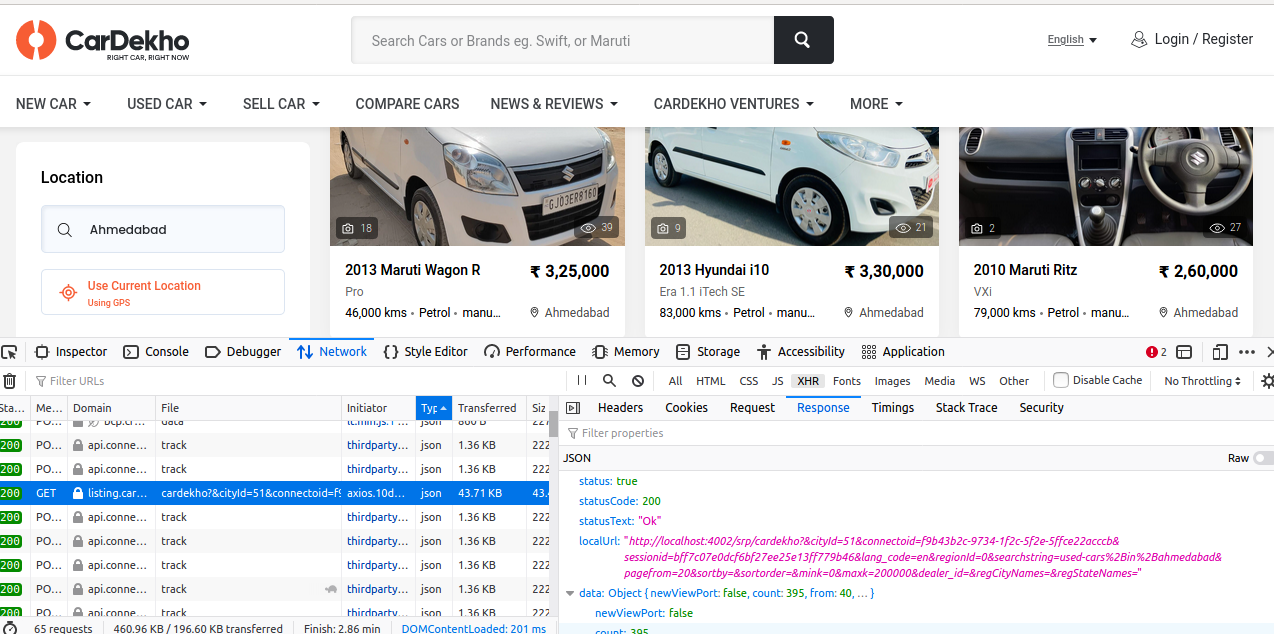


Technicality involved to fetch the data :We are taking the data from https://www.cardekho.com/
where they are making the third party call which renders the data as json reponse https://listing.cardekho.com/v1/srp/cardekho?&lang_code=en&regionId=0&searchstring=cars%2Bin%2bangalore&pagefrom=0

while this gives the cars list with few details ,but to get further details of car we are scraping another details page as below.
"https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-1.2-Delta-cars-Mumbai_2431c7fd-a748-442e-b3c5-a8b4171b395a.htm"


We are using BeautifulSoup to extract the data from webpage.

We have around 10000 car records , we are fetching only 2000 records as there is time constraint it almost took 30-45 mins to fetch 2000 records data with around 108 columns.

We have generated CSV file with the data that we scraped from web to over come time waiting to get the data.We have worked on ubuntu - google colab so some of the settings have been related to that.

To directly run the code we can just execute the import statements cell then directly we can go to the cell where we are loading the data from csv


Importing required libraries for the problem.



In [ ]:
## This is required only if we are working on the cloud environment otherwise,
## if using our local system is already set with the python required libraries this section is not require
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
!pip install --upgrade requests
!pip install skfeature-chappers --upgrade
!!pip install mlxtend --upgrade

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bi

['Requirement already satisfied: mlxtend in /usr/local/lib/python3.7/dist-packages (0.14.0)',
 'Collecting mlxtend',
 '  Downloading mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)',
 '\x1b[?25l',
 '\x1b[K     |▎                               | 10 kB 14.5 MB/s eta 0:00:01',
 '\x1b[K     |▌                               | 20 kB 12.3 MB/s eta 0:00:01',
 '\x1b[K     |▊                               | 30 kB 10.3 MB/s eta 0:00:01',
 '\x1b[K     |█                               | 40 kB 9.0 MB/s eta 0:00:01',
 '\x1b[K     |█▏                              | 51 kB 4.3 MB/s eta 0:00:01',
 '\x1b[K     |█▌                              | 61 kB 5.1 MB/s eta 0:00:01',
 '\x1b[K     |█▊                              | 71 kB 5.3 MB/s eta 0:00:01',
 '\x1b[K     |██                              | 81 kB 5.5 MB/s eta 0:00:01',
 '\x1b[K     |██▏                             | 92 kB 6.1 MB/s eta 0:00:01',
 '\x1b[K     |██▍                             | 102 kB 5.1 MB/s eta 0:00:01',
 '\x1b[K     |██▊               

In [ ]:
import requests
from pandas import json_normalize
import json
import pandas as pd
from bs4 import BeautifulSoup
import requests
import time
import matplotlib.pyplot as plt
import numpy as np
from selenium import webdriver
import seaborn as sns
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from skfeature.function.statistical_based import f_score, chi_square, gini_index
from sklearn.feature_selection import mutual_info_classif
from skfeature.function.similarity_based import fisher_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2.1 Code for scraping data from website


In [ ]:

def scrapeBasicCardetails():

  ## The URL which provides json response about cars
  baseURL = 'https://listing.cardekho.com/v1/srp/cardekho?&lang_code=en&regionId=0&searchstring=cars%2Bin%2bangalore&pagefrom='

  print(f'{baseURL}{0}')
  ## requesting the webpage for response
  response=requests.get(f'{baseURL}{0}')
   ##list holds the list of cars

  listDataFrameCars=[]

  ## check for the response
  if response.status_code ==200:

    ##storing the reponse back to python dictionary
    jsonDict = response.json()
    ##fetching the total records available
    totalRecAvailable=response.json()['data']['count']
    ##close the reponse
    #response.close()



    ##check whether there are records
    if totalRecAvailable!=0:

      #print(totalRecAvailable)
      for i in range(0,2000,20):
        ##URL construction for request
        # url = f'{baseURL}{i}'
        # print(url)
        response = requests.get(f'{baseURL}{i}')
        ##look for the repsonse
        # if response.status_code ==200:
        dictr = response.json()
        # fetching the data of cars
        recs=dictr['data']['cars']
        df_new = json_normalize(recs)
        #response.close()
        listDataFrameCars.append(df_new)


    else:
      print('No records')

  return listDataFrameCars



The function to fetch the further details of car.

In [ ]:

def fetchCarDetailsForCar(df):

    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    # open it, go to a website, and get results
    wd = webdriver.Chrome('chromedriver',options=options)
    dvlink=df['vlink']

    ##This is to fetch the details from the webpage of cardetails
    listOfKeysForCar=['vlink', 'Make Year', 'Reg. year', 'Fuel', 'KMs Driven', 'Engine Displacement', 'No Of Owner(s)', 'RTO', 'Transmission', 'Insurance Type', 'Mileage', 'Engine', 'Torque', 'Wheel Size', 'Seats', 'Color', 'Gear Box', 'isExpiredModel', 'Seating Capacity', 'Steering Type', 'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type',  'No Door Numbers', 'Cargo Volumn', 'Engine Type', 'Displacement', 'No of Cylinder', 'Values per Cylinder', 'Value Configuration',  'Length', 'Width', 'Height', 'Kerb Weight', 'Gross Weight']

    ## dictionary to store data key,value
    dictionaryToStoreData = dict.fromkeys(listOfKeysForCar)

    ##baseURL of website
    baseURL='https://www.cardekho.com'

    ## to fetch all the attributes
    for cnt in range(0,len(dvlink)):
        #print(vlink)
        url=f'{baseURL}{dvlink[cnt]}'
        html_text=wd.get(url)

        #wait = WebDriverWait(driver, 20)
        #print(wd.page_source)
        #time.sleep(10)

        ##req the webpage
        webpageSoup=BeautifulSoup(wd.page_source)
        ##close the webdriver as the resposnse is stored in webpageSoup
        #wd.close()

        ## getting the ul list from the webpage which have the atrributes
        detailsList=webpageSoup.find_all('ul',class_='gsc_row detailsList')

        if dictionaryToStoreData['vlink'] is None:
          dictionaryToStoreData['vlink']=[dvlink[cnt]]
        else:
          dictionaryToStoreData['vlink'].append(dvlink[cnt])

        localKeyList=['vlink']

        ##fetching the other details of the car
        for detail in detailsList:
            ##To fetch the details of div
            detailListIcons=detail.find_all('div',class_='listIcons')

            ## to fetch all the icons in the div
            for data in detailListIcons:
                #print(data)
                key=data.find('div',class_='head').text

                ## if the key is there in the mentioned list then only we will proceed to fetch the values
                if key in listOfKeysForCar:
                  localKeyList.append(key)
                  value=data.find('div',class_='fontweight500 value').text

                  ##if the key has no value : assign first else value None-->NAN else append the value
                  if dictionaryToStoreData[key] is None:
                      if value is None:
                        dictionaryToStoreData[key]=[np.NAN]
                      else:
                        dictionaryToStoreData[key]=[value]
                  elif value is None:
                      dictionaryToStoreData[key].append(np.nan)
                  else:
                      dictionaryToStoreData[key].append(value)


                  #print(dictionaryToStoreData)
        ## this is to see whether all the keys have values if it is None replacing with NAN
        for k in listOfKeysForCar:
          if k not in localKeyList:
            if dictionaryToStoreData[k] is None:
                dictionaryToStoreData[k]=[np.nan]
            else:
                dictionaryToStoreData[k].append(np.nan)

    return dictionaryToStoreData


## 2.2 Code for converting the above scraped data into a dataframe

In [ ]:
begin = time.time()
print("--------Started extractting the data------------")
listOfCars=scrapeBasicCardetails()
if len(listOfCars)!=0:
    df = pd.concat(listOfCars,ignore_index=True,axis=0)
    print(f"Created base carlist data {df.shape}")
    print(f'fetching the cardetails data........please wait...')
    dictionaryDF=fetchCarDetailsForCar(df)
    # for k,v in dictionaryDF.items():
    #   print(k,len(v))
    ##Cars detail dataframe
    print("Fetching details of car is done...now we are creating dataframe ---")
    df_new=pd.DataFrame.from_dict(dictionaryDF)
    #df_new.head(5)
    carsScrapeDF=pd.concat([df, df_new], axis=1)


    carsScrapeDF.drop('vlink',inplace=True,axis=1)
    #carsDF.to_csv("car_data.csv",index=False)
    # store end time
    print("...........DONE ...........")
    print(carsScrapeDF.head(2))
    end = time.time()

    # total time taken
    print(f"Total time taken to scrape and fetch the data  is {end - begin}")
    print("-------Writing the dataframe to drive as csv--------")
    ##This is to write the data to file output.csv
    drive.mount('/content/drive')
    path = '/content/drive/My Drive/Scraped_oldcars_data.csv'

    with open(path, 'w', encoding = 'utf-8-sig') as f:
      carsScrapeDF.to_csv(f,index=False)
else:
  print("-----------------NO DATA-------------------please try later")

--------Started extractting the data------------
https://listing.cardekho.com/v1/srp/cardekho?&lang_code=en&regionId=0&searchstring=cars%2Bin%2bangalore&pagefrom=0
Created base carlist data (2000, 75)
fetching the cardetails data........please wait...
Fetching details of car is done...now we are creating dataframe ---
...........DONE ...........
              loc  myear         bt      tt      ft     km  it  \
0  ghatkopar west   2020  Hatchback  manual  Petrol  6,166   1   
1   goregaon east   2019  Hatchback  manual  Petrol  9,416   1   

                                                  pi  \
0  https://images10.gaadicdn.com/usedcar_image/or...   
1  https://images10.gaadicdn.com/usedcar_image/or...   

                                              images pn used_car_price  \
0  [{'img': 'https://images10.gaadicdn.com/usedca...          6,99,000   
1  [{'img': 'https://images10.gaadicdn.com/usedca...          6,87,000   

         pu                      dvn  ic     ucid  \
0  6,99,

In [ ]:

path = '/content/drive/My Drive/oldcars_data.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  carsScrapeDF.to_csv(f,index=False)


In [ ]:
drive.mount('/content/drive',force_remount=True)
carsDF=pd.read_csv("/content/drive/My Drive/Scraped_oldcars_data.csv")
#carsDF.drop('Unnamed: 0',inplace=True,axis=1)

Mounted at /content/drive


## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [ ]:
carsDF.head(5)

loc  myear         bt  ...  Height Kerb Weight Gross Weight
0  ghatkopar west   2020  Hatchback  ...  1510mm       870kg       1340kg
1   goregaon east   2019  Hatchback  ...  1510mm       880kg       1340kg
2   goregaon east   2017        SUV  ...  1630mm         NaN          NaN
3  ghatkopar west   2016  Hatchback  ...  1478mm      1153kg       1620kg
4   goregaon east   2018  Hatchback  ...  1510mm     910-935       1360kg

[5 rows x 109 columns]

In [ ]:
carsDF.tail(5)

loc  myear         bt  ... Height Kerb Weight Gross Weight
1995   yelahanka   2016  Hatchback  ...    NaN         NaN          NaN
1996   ram nagar   2019      Sedan  ...    NaN         NaN          NaN
1997    ammerpet   2016      Sedan  ...    NaN         NaN          NaN
1998   ram nagar   2018  Hatchback  ...    NaN         NaN          NaN
1999  thane west   2014      Sedan  ...    NaN         NaN          NaN

[5 rows x 109 columns]

## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
carsDF.describe()

myear           it   pn           ic          ucid           ip  \
count  2000.000000  2000.000000  0.0  2000.000000  2.000000e+03  2000.000000   
mean   2015.986000     0.654000  NaN    17.267000  3.290831e+06     0.000500   
std       2.892575     0.475812  NaN     9.025876  5.384448e+04     0.022361   
min    2004.000000     0.000000  NaN     0.000000  2.938441e+06     0.000000   
25%    2014.000000     0.000000  NaN    13.000000  3.280164e+06     0.000000   
50%    2016.000000     1.000000  NaN    14.000000  3.312142e+06     0.000000   
75%    2018.000000     1.000000  NaN    24.000000  3.326688e+06     0.000000   
max    2021.000000     1.000000  NaN    56.000000  3.327429e+06     1.000000   

          p_numeric  webp_image     position       pageNo  centralVariantId  \
count  2.000000e+03         0.0  2000.000000  2000.000000       2000.000000   
mean   6.667930e+05         NaN    10.500000    50.500000       4480.710500   
std    5.704109e+05         NaN     5.767723    28.873289       2218.053908   
min    4.000000e+04         NaN     1.000000     1.000000         18.000000   
25%    3.800000e+05         NaN     5.750000    25.750000       2191.750000   
50%    5.190000e+05         NaN    10.500000    50.500000       4242.000000   
75%    7.452500e+05         NaN    15.250000    75.250000       6408.750000   
max    8.290000e+06         NaN    20.000000   100.000000       8707.000000   

           modelId       is_ftc        views      gaadi_id  whatsAppMsg  \
count  2000.000000  2000.000000  1810.000000  2.000000e+03          0.0   
mean    772.786500     0.224000   781.858011  3.028960e+06          NaN   
std     816.076829     0.417026   918.960626  5.543225e+04          NaN   
min       8.000000     0.000000     0.000000  2.687230e+06          NaN   
25%     266.000000     0.000000    37.000000  3.018867e+06          NaN   
50%     586.000000     0.000000   565.000000  3.047742e+06          NaN   
75%     804.000000     0.000000  1099.750000  3.066817e+06          NaN   
max    3264.000000     1.000000  8165.000000  3.067638e+06          NaN   

               waNo  isGenuine   dynx_itemid  dynx_itemid2  dynx_totalvalue  \
count  2.000000e+03     2000.0  2.000000e+03   2000.000000     2.000000e+03   
mean   1.416667e+09        0.0  3.028960e+06   4480.710500     6.667930e+05   
std    0.000000e+00        0.0  5.543225e+04   2218.053908     5.704109e+05   
min    1.416667e+09        0.0  2.687230e+06     18.000000     4.000000e+04   
25%    1.416667e+09        0.0  3.018867e+06   2191.750000     3.800000e+05   
50%    1.416667e+09        0.0  3.047742e+06   4242.000000     5.190000e+05   
75%    1.416667e+09        0.0  3.066817e+06   6408.750000     7.452500e+05   
max    1.416667e+09        0.0  3.067638e+06   8707.000000     8.290000e+06   

          imgCount  trustmarkDto.count  seller_location.lat  \
count  2000.000000              1308.0          1861.000000   
mean     17.267000                 1.0            20.424685   
std       9.025876                 0.0             5.610103   
min       0.000000                 1.0            10.528900   
25%      13.000000                 1.0            17.368371   
50%      14.000000                 1.0            19.100046   
75%      24.000000                 1.0            26.780136   
max      56.000000                 1.0            30.681624   

       seller_location.lng  ftcfeatures.interior  ftcfeatures.exterior  \
count          1861.000000                 448.0                 448.0   
mean             76.207736                   1.0                   1.0   
std               3.039782                   0.0                   0.0   
min              72.499131                   1.0                   1.0   
25%              72.918365                   1.0                   1.0   
50%              77.082542                   1.0                   1.0   
75%              77.642596                   1.0                   1.0   
max              88.462639      

In [ ]:
carsDF.shape

(2000, 109)

In [ ]:
carsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 109 entries, loc to Gross Weight
dtypes: bool(8), float64(19), int64(18), object(64)
memory usage: 1.6+ MB


In [ ]:
carsDF.dtypes

loc                          object
myear                         int64
bt                           object
tt                           object
ft                           object
km                           object
it                            int64
pi                           object
images                       object
pn                          float64
used_car_price               object
pu                           object
dvn                          object
ic                            int64
ucid                          int64
sid                          object
ip                            int64
oem                          object
model                        object
vid                          object
city                         object
p_numeric                     int64
webp_image                  float64
position                      int64
pageNo                        int64
centralVariantId              int64
isExpiredModel                 bool
modelId                     

## 2.5 Write your observations from the above.
1. Size of the dataset - 2000 tuples with 109 features
2. What type of data attributes are there? The data has both numerical and object data types
3. Is there any null data that has to be cleaned?
 Yes there is null data , which needs to be cleaned

In [ ]:
carsDF.isnull().values.any()

True

In [ ]:
carsDF.isnull().sum()

loc                          139
myear                          0
bt                             0
tt                             0
ft                             0
km                             0
it                             0
pi                            36
images                         0
pn                          2000
used_car_price                 0
pu                             0
dvn                            0
ic                             0
ucid                           0
sid                            0
ip                             0
oem                            0
model                          0
vid                            0
city                           0
p_numeric                      0
webp_image                  2000
position                       0
pageNo                         0
centralVariantId               0
isExpiredModel                 0
modelId                        0
is_ftc                         0
utype                          0
views     

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
carsDF.columns

Index(['loc', 'myear', 'bt', 'tt', 'ft', 'km', 'it', 'pi', 'images', 'pn',
       ...
       'Engine Type', 'Displacement', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Length', 'Width', 'Height', 'Kerb Weight',
       'Gross Weight'],
      dtype='object', length=109)

Before proceeding with the further data cleanup, as the data is collected from the web, observed that the some columns are w.r.t the displaying attributes which are not necessary for our problem statement.

In [ ]:

webRelatedColumns=['dynx_itemid','dynx_itemid2','dynx_totalvalue', 'pi','images','webp_image','sid','imgCount','position','pageNo','benefits','emiwidget.title','emiwidget.cost','emiwidget.duration','emiwidget.caption','emiwidget.btntext','emiwidget.btnUrl','bookNow.bookingVdpLink','bookNow.buttonText','bookNow.skuId','msp','bookNow.msp','ftcfeatures.interior','ftcfeatures.exterior',
'ftcfeatures.video','ftcfeatures.threesixty','trustmarkDto.count','trustmarkDto.heading','trustmarkDto.label','trustmarkDto.benefits','trustmarkDto.testDrive','trustmarkDto.status','trustmarkDto.subBenefits']

##dropping the above mentioned columns from data frame
print(f"Dropping the webrelated columns :{len(webRelatedColumns)}")
carsDF.drop(columns=webRelatedColumns,inplace=True,axis=1)
print("-----------Dropped------------")


Dropping the webrelated columns :33
-----------Dropped------------


In [ ]:
carsDF.shape

(2000, 76)

In [ ]:
carsDF.head(2)

loc  myear         bt      tt      ft     km  it  pn  \
0  ghatkopar west   2020  Hatchback  manual  Petrol  6,166   1 NaN   
1   goregaon east   2019  Hatchback  manual  Petrol  9,416   1 NaN   

  used_car_price        pu                      dvn  ic     ucid  ip     oem  \
0       6,99,000  6,99,000  Maruti Baleno 1.2 Delta  14  3326309   0  Maruti   
1       6,87,000  6,87,000   Maruti Baleno 1.2 Zeta  13  3326308   0  Maruti   

           model                      vid    city  p_numeric  \
0  Maruti Baleno  Maruti Baleno 1.2 Delta  Mumbai     699000   
1  Maruti Baleno   Maruti Baleno 1.2 Zeta  Mumbai     687000   

   centralVariantId  isExpiredModel  modelId  is_ftc   utype  views  \
0              3962           False      586       0  Dealer  136.0   
1              3969           False      586       0  Dealer   61.0   

   tmGaadiStore  gaadi_id  whatsAppMsg        waNo  isShowCTA  isAssured  \
0          True   3060782          NaN  1416666666      False       True   
1          True   3048271          NaN  1416666666      False       True   

  carVariant  isGenuine  isBooked  justAdded  isHomeDeliver  refurbished  \
0  1.2 Delta          0     False      False          False        False   
1   1.2 Zeta          0     False      False          False        False   

  transmissionType                            seller_location.address  \
0           Manual  Ground Floor, MCGM Parking, The Address Wadhwa...   
1           Manual  Ground Floor, MCGM Parking, Lodha Fiorenza, Ad...   

   seller_location.lat  seller_location.lng  Make Year Reg. year    Fuel  \
0            19.100046            72.918365     2020.0  Oct 2020  Petrol   
1            19.153501            72.855713     2019.0  Apr 2019  Petrol   

  KMs Driven Engine Displacement No Of Owner(s)   RTO Transmission  \
0  6,166 Kms             1197 cc      1st Owner  MH04       Manual   
1  9,416 Kms             1197 cc      2nd Owner  MH01       Manual   

          Insurance Type    Mileage   Engine Torque Wheel Size  Seats Color  \
0  Third Party insurance  21.4 kmpl  1197 CC  115Nm        NaN    5.0  Blue   
1  Third Party insurance  21.4 kmpl  1197 CC  115Nm         16    5.0  Blue   

  Gear Box  isExpiredModel.1  Seating Capacity Steering Type Turning Radius  \
0  5 Speed               NaN               5.0         Power     4.9 meters   
1  5 Speed               NaN               5.0         Power     4.9 meters   

  Front Brake Type Rear Brake Type        Tyre Type  No Door Numbers  \
0             Disc            Drum  Tubeless,Radial              5.0   
1             Disc            Drum  Tubeless,Radial              5.0   

  Cargo Volumn        Engine Type  Displacement  No of Cylinder  \
0   339-litres  VVT Petrol Engine        1197.0             4.0   
1   339-litres  VVT Petrol Engine        1197.0             4.0   

   Values per Cylinder Value Configuration  Length   Width  Height  \
0                  4.0                DOHC  3995mm  1745mm  1510mm   
1                  4.0                DOHC  3995mm  1745mm  1510mm   

  Kerb Weight Gross Weight  
0       870kg       1340kg  
1       880kg       1340kg

As we see that we have data of type categorical,numerical data types and there are sum columns still with nan values

In [ ]:
carsDF.isna().sum()

loc                         139
myear                         0
bt                            0
tt                            0
ft                            0
km                            0
it                            0
pn                         2000
used_car_price                0
pu                            0
dvn                           0
ic                            0
ucid                          0
ip                            0
oem                           0
model                         0
vid                           0
city                          0
p_numeric                     0
centralVariantId              0
isExpiredModel                0
modelId                       0
is_ftc                        0
utype                         0
views                       190
tmGaadiStore                  0
gaadi_id                      0
whatsAppMsg                2000
waNo                          0
isShowCTA                     0
isAssured                     0
carVaria

In [ ]:
# Delete columns containing either 90% or more than 90% NaN Values
print(f"Before dropping {carsDF.shape}")
perc = 90.0
min_count =  int(((100-perc)/100)*carsDF.shape[0] + 1)
carsDF.dropna(inplace=True,axis=1,thresh=min_count)
print(f"After dropping columns with 90% NaN values:{carsDF.shape}")

Before dropping (2000, 76)
After dropping columns with 90% NaN values:(2000, 73)


In [ ]:
carsDF.isna().sum()

loc                         139
myear                         0
bt                            0
tt                            0
ft                            0
km                            0
it                            0
used_car_price                0
pu                            0
dvn                           0
ic                            0
ucid                          0
ip                            0
oem                           0
model                         0
vid                           0
city                          0
p_numeric                     0
centralVariantId              0
isExpiredModel                0
modelId                       0
is_ftc                        0
utype                         0
views                       190
tmGaadiStore                  0
gaadi_id                      0
waNo                          0
isShowCTA                     0
isAssured                     0
carVariant                    0
isGenuine                     0
isBooked

# 3. Data Preparation

## 3.1 Display how many unique values are present in each attribute


In [ ]:
for column in carsDF.columns:
  print(f'{column} :{carsDF[column].nunique()}')

loc :145
myear :18
bt :7
tt :2
ft :5
km :1635
it :2
used_car_price :928
pu :928
dvn :884
ic :41
ucid :2000
ip :2
oem :26
model :170
vid :884
city :117
p_numeric :928
centralVariantId :966
isExpiredModel :1
modelId :292
is_ftc :2
utype :2
views :1030
tmGaadiStore :2
gaadi_id :2000
waNo :1
isShowCTA :1
isAssured :2
carVariant :757
isGenuine :1
isBooked :1
justAdded :1
isHomeDeliver :1
refurbished :1
transmissionType :2
seller_location.address :199
seller_location.lat :199
seller_location.lng :199
Make Year :13
Reg. year :129
Fuel :4
KMs Driven :1301
Engine Displacement :44
No Of Owner(s) :3
RTO :129
Transmission :2
Insurance Type :5
Mileage :191
Engine :44
Torque :110
Wheel Size :12
Seats :5
Color :278
Gear Box :30
Seating Capacity :5
Steering Type :6
Turning Radius :60
Front Brake Type :12
Rear Brake Type :12
Tyre Type :16
No Door Numbers :3
Cargo Volumn :117
Engine Type :146
Displacement :44
No of Cylinder :3
Values per Cylinder :3
Value Configuration :5
Length :111
Width :90
Height :9

##Dropping the columns with the single unique which doesnt gives us the relation with the columns

In [ ]:
for column in carsDF.columns:
  #print(f'{column} :{len(carsDF[column].unique())}')
  if len(carsDF[column].unique())==1:
    print(f'Dropping :{column} value:{carsDF[column].unique()} :{len(carsDF[column].unique())}')
    carsDF.drop(column,inplace=True,axis=1)

Dropping :isExpiredModel value:[False] :1
Dropping :waNo value:[1416666666] :1
Dropping :isShowCTA value:[False] :1
Dropping :isGenuine value:[0] :1
Dropping :isBooked value:[False] :1
Dropping :justAdded value:[False] :1
Dropping :isHomeDeliver value:[False] :1
Dropping :refurbished value:[False] :1


Removing columns with the ID values which doesnot gives in prediction of the price of the car.

In [ ]:
len(carsDF['centralVariantId'].unique())

966

In [ ]:
columnsWithID=['ic', 'ucid', 'ip','centralVariantId','gaadi_id']
print(f'Dropping columns with id values :{columnsWithID}')
carsDF.drop(columnsWithID,inplace=True,axis=1)
print("-----------------dropped--------------")

Dropping columns with id values :['ic', 'ucid', 'ip', 'centralVariantId', 'gaadi_id']
-----------------dropped--------------


## 3.2 Check for the presence of duplicate data, identify the attributes with duplicate data, report the attributes. Mention the method adopted to remove duplicate data if present. Report the results again.

In [ ]:
duplicate = carsDF[carsDF.duplicated()]

print("Duplicate Rows :")

# Print the resultant Dataframe
print(len(duplicate))
carsDF.shape

Duplicate Rows :
1


(2000, 60)

In [ ]:
carsDF = carsDF.loc[:,~carsDF.columns.duplicated()]

carsDF.shape

(2000, 60)

In [ ]:
carsDF = carsDF.T.drop_duplicates().T
carsDF.shape

(2000, 55)

Observed that still some of the columns looks to be duplicated

In [ ]:
carsDF[['Make Year','myear']].head(2)

Make Year myear
0    2020.0  2020
1    2019.0  2019

In [ ]:
carsDF[['KMs Driven','km']].head(2)

KMs Driven     km
0  6,166 Kms  6,166
1  9,416 Kms  9,416

In [ ]:
carsDF[['tt','transmissionType','Transmission']].head(2)

tt transmissionType Transmission
0  manual           Manual       Manual
1  manual           Manual       Manual

In [ ]:
carsDF[['ft','Fuel']].head(2)


ft    Fuel
0  Petrol  Petrol
1  Petrol  Petrol

In [ ]:
carsDF[['used_car_price','p_numeric']].head(2)

used_car_price p_numeric
0       6,99,000    699000
1       6,87,000    687000

In [ ]:
##Removing the above duplicated columns
dupColumns=['Make Year','KMs Driven','tt','Transmission','Fuel','used_car_price']
print(f'Dropping the columns {dupColumns}')
carsDF.drop(dupColumns,inplace=True,axis=1)
print('*******Dropped**********')

Dropping the columns ['Make Year', 'KMs Driven', 'tt', 'Transmission', 'Fuel', 'used_car_price']
*******Dropped**********


In [ ]:
carsDF.shape

(2000, 49)

In [ ]:
carsDF.head(2)

loc myear         bt      ft     km it                      dvn  \
0  ghatkopar west  2020  Hatchback  Petrol  6,166  1  Maruti Baleno 1.2 Delta   
1   goregaon east  2019  Hatchback  Petrol  9,416  1   Maruti Baleno 1.2 Zeta   

      oem          model    city p_numeric modelId is_ftc   utype  views  \
0  Maruti  Maruti Baleno  Mumbai    699000     586      0  Dealer  136.0   
1  Maruti  Maruti Baleno  Mumbai    687000     586      0  Dealer   61.0   

  carVariant transmissionType  \
0  1.2 Delta           Manual   
1   1.2 Zeta           Manual   

                             seller_location.address seller_location.lat  \
0  Ground Floor, MCGM Parking, The Address Wadhwa...           19.100046   
1  Ground Floor, MCGM Parking, Lodha Fiorenza, Ad...           19.153501   

  seller_location.lng Reg. year Engine Displacement No Of Owner(s)   RTO  \
0           72.918365  Oct 2020             1197 cc      1st Owner  MH04   
1           72.855713  Apr 2019             1197 cc      2nd Owner  MH01   

          Insurance Type    Mileage   Engine Torque Wheel Size Seats Color  \
0  Third Party insurance  21.4 kmpl  1197 CC  115Nm        NaN   5.0  Blue   
1  Third Party insurance  21.4 kmpl  1197 CC  115Nm         16   5.0  Blue   

  Gear Box Steering Type Turning Radius Front Brake Type Rear Brake Type  \
0  5 Speed         Power     4.9 meters             Disc            Drum   
1  5 Speed         Power     4.9 meters             Disc            Drum   

         Tyre Type No Door Numbers Cargo Volumn        Engine Type  \
0  Tubeless,Radial             5.0   339-litres  VVT Petrol Engine   
1  Tubeless,Radial             5.0   339-litres  VVT Petrol Engine   

  Displacement No of Cylinder Values per Cylinder Value Configuration  Length  \
0       1197.0            4.0                 4.0                DOHC  3995mm   
1       1197.0            4.0                 4.0                DOHC  3995mm   

    Width  Height Kerb Weight Gross Weight  
0  1745mm  1510mm       870kg       1340kg  
1  1745mm  1510mm       880kg       1340kg

In [ ]:
carsDF.columns.str.strip()

Index(['loc', 'myear', 'bt', 'ft', 'km', 'it', 'dvn', 'oem', 'model', 'city',
       'p_numeric', 'modelId', 'is_ftc', 'utype', 'views', 'carVariant',
       'transmissionType', 'seller_location.address', 'seller_location.lat',
       'seller_location.lng', 'Reg. year', 'Engine Displacement',
       'No Of Owner(s)', 'RTO', 'Insurance Type', 'Mileage', 'Engine',
       'Torque', 'Wheel Size', 'Seats', 'Color', 'Gear Box', 'Steering Type',
       'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type',
       'No Door Numbers', 'Cargo Volumn', 'Engine Type', 'Displacement',
       'No of Cylinder', 'Values per Cylinder', 'Value Configuration',
       'Length', 'Width', 'Height', 'Kerb Weight', 'Gross Weight'],
      dtype='object')

In [ ]:
carsDF.dtypes

loc                        object
myear                      object
bt                         object
ft                         object
km                         object
it                         object
dvn                        object
oem                        object
model                      object
city                       object
p_numeric                  object
modelId                    object
is_ftc                     object
utype                      object
views                      object
carVariant                 object
transmissionType           object
seller_location.address    object
seller_location.lat        object
seller_location.lng        object
Reg. year                  object
Engine Displacement        object
No Of Owner(s)             object
RTO                        object
Insurance Type             object
Mileage                    object
Engine                     object
Torque                     object
Wheel Size                 object
Seats         

##Converting the numerical data type to respective data types based on the values that is existing in the data and then removing special characters in the numerical column

In [ ]:
numerical_columns=['myear','km','p_numeric','modelId','is_ftc','views','seller_location.lat','seller_location.lng','Engine Displacement','Mileage','Engine','Cargo Volumn','Torque','Wheel Size','Turning Radius','No Door Numbers','Displacement','No of Cylinder','Values per Cylinder','Length','Width','Height','Kerb Weight','Gross Weight','Seats']
len(numerical_columns)
for column in numerical_columns:
  #print(carsDF[column].unique())
  ##replace the special characters
  carsDF[column].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
  ##converting to numerical datatype
  carsDF[column]=pd.to_numeric(carsDF[column], errors='coerce')

carsDF[numerical_columns].dtypes


myear                    int64
km                       int64
p_numeric                int64
modelId                  int64
is_ftc                   int64
views                  float64
seller_location.lat    float64
seller_location.lng    float64
Engine Displacement    float64
Mileage                float64
Engine                 float64
Cargo Volumn           float64
Torque                 float64
Wheel Size             float64
Turning Radius         float64
No Door Numbers        float64
Displacement           float64
No of Cylinder         float64
Values per Cylinder    float64
Length                 float64
Width                  float64
Height                 float64
Kerb Weight            float64
Gross Weight           float64
Seats                  float64
dtype: object

In [ ]:
carsDF[numerical_columns].head(4)

myear     km  p_numeric  modelId  is_ftc  views  seller_location.lat  \
0   2020   6166     699000      586       0  136.0            19.100046   
1   2019   9416     687000      586       0   61.0            19.153501   
2   2017  65716     883000      245       0  120.0            19.153501   
3   2016  48846     621000     3117       0  103.0            19.100046   

   seller_location.lng  Engine Displacement  Mileage  Engine  Cargo Volumn  \
0            72.918365               1197.0    21.40  1197.0           NaN   
1            72.855713               1197.0    21.40  1197.0           NaN   
2            72.855713               1591.0    15.29  1591.0           NaN   
3            72.918365               1197.0      NaN  1197.0         280.0   

   Torque  Wheel Size  Turning Radius  No Door Numbers  Displacement  \
0   115.0         NaN            4.90              5.0        1197.0   
1   115.0        16.0            4.90              5.0        1197.0   
2   151.0         NaN            5.30              5.0        1591.0   
3   175.0        16.0            4.97              5.0        1197.0   

   No of Cylinder  Values per Cylinder  Length   Width  Height  Kerb Weight  \
0             4.0                  4.0  3995.0  1745.0  1510.0        870.0   
1             4.0                  4.0  3995.0  1745.0  1510.0        880.0   
2             4.0                  4.0  4270.0  1780.0  1630.0          NaN   
3             NaN                  4.0  3971.0  1682.0  1478.0       1153.0   

   Gross Weight  Seats  
0        1340.0    5.0  
1        1340.0    5.0  
2           NaN    5.0  
3        1620.0    5.0

We can observe from the above the numerical data's special characters is been removed now the data looks cleaned with missing values.

The below function is defined to use it many places

In [ ]:
def getColumnsDataTypeOfDF(df,type='cat'):
  if type=='cat':
      cat_columns=[column  for column in df.columns if df[column].dtype=='object']
      return cat_columns
  else:
    df_dtypes = np.array(df.dtypes)
    ##biufc b bool i int u unsigned int, f float, c complex.
    df_numericDtypes= [column  for column in df.columns  if df[column].dtype.kind in 'biufc']
    return df_numericDtypes

In [ ]:
cat_columns=getColumnsDataTypeOfDF(carsDF,'cat')
for column in cat_columns:
  print(f'{column}:{carsDF[column].unique()}')

loc:['ghatkopar west' 'goregaon east' 'btm layout' 'attapur' 'wakad' nan
 'museum road' 'jaipur' 'fatehpur beri b.o' 'kaushambi' 'ghitorni' 'noida'
 'bhat' 'daria' 'mangolpuri a block' 'gurgaon south city ii' 'sakinaka'
 'ashok vihar' 'ramesh nagar' 'garia bt' 'malad' 'bavdhan'
 'jogeshwari east' 'kandivali west' 'bangalore city' 'badlapur e.d.'
 'nagole' 'vaishya sabha' 'thane west' 'kharadi' 'ambattur' 'andheri east'
 'powai' 'ambawadi' 'rahmath nagar' 'borivali west' 'choolaimedu'
 'thygaraya nagar' 'antop hill' 'medavakkam' 'khar colony' 'janakpuri'
 'rasta peth' 'adambakkam' 'vikas puri' 'vijay nagar' 'andheri west'
 'mannuthy' 'okhla industrial area phase-i' 'mundhva' 'badli' 'manicktala'
 'sikandra' 'ashoknagar' 'hadapsar' 'bhowanipore' 'vileeparle'
 'bandra west' 'lajpat nagar' 'naranpura' 'vidyanagar' 'sector 57'
 'preet vihar' 'gandhipuram' 'raipur ganj' 'peelamedu' 'hsr layout'
 'netaji nagar' 'naraina' 'alampur' 'rohini sector 25' 'hbr layout'
 'yelahanka' 'geeta colony' 'd

In [ ]:
carsDF[['myear','Reg. year']].tail(5)

myear Reg. year
1995   2016       NaN
1996   2019       NaN
1997   2016       NaN
1998   2018       NaN
1999   2014       NaN

Registration year has null has values but where as myear doesnt looks to have null values.

## 3.3 Show whether there are any missing values in each attribute. Report the same.


In [ ]:
#show columns with null (or) n/a in df_weather_condition
def show_columns_with_missing_values(carsDF):
    lstmissingColumns=[]
    nullValueColumns = carsDF.isnull()
    for column in nullValueColumns.columns.values.tolist():

        if len(nullValueColumns[column].value_counts())==2:
          lstmissingColumns.append(column)
          print (nullValueColumns[column].value_counts())
          print("-------------------------------")
    print(f'There are total :{len(lstmissingColumns)} columns in the dataFrame with null values')
    return lstmissingColumns

show_columns_with_missing_values(carsDF)

False    1861
True      139
Name: loc, dtype: int64
-------------------------------
False    1810
True      190
Name: views, dtype: int64
-------------------------------
False    1861
True      139
Name: seller_location.address, dtype: int64
-------------------------------
False    1861
True      139
Name: seller_location.lat, dtype: int64
-------------------------------
False    1861
True      139
Name: seller_location.lng, dtype: int64
-------------------------------
False    1308
True      692
Name: Reg. year, dtype: int64
-------------------------------
False    1308
True      692
Name: Engine Displacement, dtype: int64
-------------------------------
False    1308
True      692
Name: No Of Owner(s), dtype: int64
-------------------------------
False    1308
True      692
Name: RTO, dtype: int64
-------------------------------
False    1308
True      692
Name: Insurance Type, dtype: int64
-------------------------------
False    1305
True      695
Name: Mileage, dtype: int64
------

['loc',
 'views',
 'seller_location.address',
 'seller_location.lat',
 'seller_location.lng',
 'Reg. year',
 'Engine Displacement',
 'No Of Owner(s)',
 'RTO',
 'Insurance Type',
 'Mileage',
 'Engine',
 'Torque',
 'Wheel Size',
 'Seats',
 'Color',
 'Gear Box',
 'Steering Type',
 'Turning Radius',
 'Front Brake Type',
 'Rear Brake Type',
 'Tyre Type',
 'No Door Numbers',
 'Cargo Volumn',
 'Engine Type',
 'Displacement',
 'No of Cylinder',
 'Values per Cylinder',
 'Value Configuration',
 'Length',
 'Width',
 'Height',
 'Kerb Weight',
 'Gross Weight']

## 3.4 Clean the missing data using any imputation technique, mention the method used and again report the change after cleaning the data.

In [ ]:
## As we see that there are columns with

missig_columns=show_columns_with_missing_values(carsDF)
print(missig_columns)
carsDF[missig_columns].head(10)

False    1861
True      139
Name: loc, dtype: int64
-------------------------------
False    1810
True      190
Name: views, dtype: int64
-------------------------------
False    1861
True      139
Name: seller_location.address, dtype: int64
-------------------------------
False    1861
True      139
Name: seller_location.lat, dtype: int64
-------------------------------
False    1861
True      139
Name: seller_location.lng, dtype: int64
-------------------------------
False    1308
True      692
Name: Reg. year, dtype: int64
-------------------------------
False    1308
True      692
Name: Engine Displacement, dtype: int64
-------------------------------
False    1308
True      692
Name: No Of Owner(s), dtype: int64
-------------------------------
False    1308
True      692
Name: RTO, dtype: int64
-------------------------------
False    1308
True      692
Name: Insurance Type, dtype: int64
-------------------------------
False    1305
True      695
Name: Mileage, dtype: int64
------

loc  views                            seller_location.address  \
0  ghatkopar west  136.0  Ground Floor, MCGM Parking, The Address Wadhwa...   
1   goregaon east   61.0  Ground Floor, MCGM Parking, Lodha Fiorenza, Ad...   
2   goregaon east  120.0  Ground Floor, MCGM Parking, Lodha Fiorenza, Ad...   
3  ghatkopar west  103.0  Ground Floor, MCGM Parking, The Address Wadhwa...   
4   goregaon east   37.0  Ground Floor, MCGM Parking, Lodha Fiorenza, Ad...   
5      btm layout  134.0  Sri Shivananda Stores, HSR Layout - Bookmycrac...   
6   goregaon east   73.0  Ground Floor, MCGM Parking, Lodha Fiorenza, Ad...   
7   goregaon east  150.0  Ground Floor, MCGM Parking, Lodha Fiorenza, Ad...   
8      btm layout  405.0  Sri Shivananda Stores, HSR Layout - Bookmycrac...   
9         attapur  202.0  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...   

   seller_location.lat  seller_location.lng Reg. year  Engine Displacement  \
0            19.100046            72.918365  Oct 2020               1197.0   
1            19.153501            72.855713  Apr 2019               1197.0   
2            19.153501            72.855713  Aug 2017               1591.0   
3            19.100046            72.918365  Dec 2016               1197.0   
4            19.153501            72.855713  Nov 2018               1197.0   
5            12.903402            77.642596  Feb 2016               1197.0   
6            19.153501            72.855713  Jan 2015               1373.0   
7            19.153501            72.855713  May 2015                998.0   
8            12.903402            77.642596  Oct 2016                799.0   
9            17.368371            78.438071  Jul 2017                998.0   

  No Of Owner(s)   RTO         Insurance Type  Mileage  Engine  Torque  \
0      1st Owner  MH04  Third Party insurance    21.40  1197.0   115.0   
1      2nd Owner  MH01  Third Party insurance    21.40  1197.0   115.0   
2      1st Owner  MH01  Third Party insurance    15.29  1591.0   151.0   
3      2nd Owner  MH02  Third Party insurance      NaN  1197.0   175.0   
4      1st Owner  MH02  Third Party insurance    19.56  1197.0   113.0   
5      1st Owner  KA04  Third Party insurance    18.60  1197.0   114.7   
6      1st Owner  MH43  Third Party insurance    20.73  1373.0   130.0   
7      2nd Owner  MH04  Third Party insurance    20.51   998.0    90.0   
8      1st Owner  KA04  Third Party insurance    22.70   799.0    72.0   
9      1st Owner  TS07  Third Party insurance    23.95   998.0    90.0   

   Wheel Size  Seats             Color Gear Box Steering Type  Turning Radius  \
0         NaN    5.0              Blue  5 Speed         Power            4.90   
1        16.0    5.0              Blue  5 Speed         Power            4.90   
2         NaN    5.0            Silver  6 Speed         Power            5.30   
3        16.0    5.0               Red  7 Speed         Power            4.97   
4         NaN    5.0         Nexa Blue      CVT      Electric            4.90   
5         NaN    5.0               Red  5 Speed         Power            5.20   
6        15.0    5.0  Pearl Snow White  5 Speed         Power            5.40   
7         NaN    5.0        Magma Grey  5 Speed         Power            4.60   
8         NaN    5.0               Red  5-Speed         Power            4.70   
9         NaN    5.0    Fire Brick Red  5 Speed         Power            4.60   

  Front Brake Type Rear Brake Type         Tyre Type  No Door Numbers  \
0             Disc            Drum   Tubeless,Radial              5.0   
1             Disc            Drum   Tubeless,Radial              5.0   
2             Disc            Drum          Tubeless              5.0   
3             Disc            Drum   Tubeless,Radial              5.0   
4             Disc            Drum   Tubeless,Radial              5.0   
5             Disc            Drum          Tubeless              5.0   
6  Ventilated Disc            Drum  Tubeless, Radial              4

## As there are some missing values in the dataframe we are replacing with them as follows:

Based on the data type of the columns we are replacing NaN values as below:

1.   float,int - mean
3.   object- mode[0]



In [ ]:
##The above columns cant be of float data type so we are converting them into int type so that null values can be imputated easily
columnsInt=['No of Cylinder','Values per Cylinder','Seats','No Door Numbers','Wheel Size','Cargo Volumn','Engine Displacement','views','Wheel Size','Kerb Weight','Gross Weight']
testDF=carsDF.copy()
for column in columnsInt:
  carsDF[column] = carsDF[column].fillna(carsDF[column].mean()).astype('int64')

## As we cant fill NaN for integer dtypes here directly we are converting into int
# carsDF[columnsInt].tail(10)

# carsDF[columnsInt].dtypes

for column in carsDF.columns:
    if carsDF[column].isna().sum() > 0 :
        if carsDF[column].dtype == 'float64':
            print(f'Filling NAN of {column} with : {carsDF[column].mean()}')
            carsDF[column].fillna(carsDF[column].mean(), inplace=True)
        if carsDF[column].dtype == 'int64':
            print(f'Filling NAN of {column} with : {carsDF[column].median()}')
            carsDF[column].fillna(df[column].median(), inplace=True)


    if carsDF[column].dtype=='object':
      value=carsDF[column].mode()[0]
      if not value==np.nan:
          carsDF[column].replace(np.nan,value, inplace=True)
          #print("iam object")



Filling NAN of seller_location.lat with : 20.424685311525334
Filling NAN of seller_location.lng with : 76.20773613016888
Filling NAN of Mileage with : 20.776727969348695
Filling NAN of Engine with : 1216.0619266055046
Filling NAN of Torque with : 135.04847859327216
Filling NAN of Turning Radius with : 4.921525000000005
Filling NAN of Displacement with : 1216.0619266055046
Filling NAN of Length with : 3925.8370313695486
Filling NAN of Width with : 1680.4621270084162
Filling NAN of Height with : 1545.0022988505748


In [ ]:
carsDF[missig_columns].tail(10)

loc  views                            seller_location.address  \
1990    ram nagar      6  124, Kalidas road, ram Nagar, coinbatore - 641...   
1991  patel nagar     37  VAS Capital Services,1/5,West Patel Nagar,New ...   
1992  ashok vihar     31  B 4/51 A, Ashok Vihar, Phase 2, New Delhi - 11...   
1993   faridabad      44  Bypass Road, Plot No- 958, Behind Sec-9, Farid...   
1994    ram nagar     15  124, Kalidas road, ram Nagar, coinbatore - 641...   
1995    yelahanka     62  Sonnappanahalli Kempegowda Intl Airport Road J...   
1996    ram nagar      5  124, Kalidas road, ram Nagar, coinbatore - 641...   
1997     ammerpet     29  7-1-46 Near Challa Hospital Lane Opp Rationwal...   
1998    ram nagar     11  124, Kalidas road, ram Nagar, coinbatore - 641...   
1999   thane west      5  Flower Valley Complex, Shop No-1, Tower 1, Gat...   

      seller_location.lat  seller_location.lng Reg. year  Engine Displacement  \
1990            11.012979            76.959701  Jan 2017                 1216   
1991            28.647637            77.165102  Jan 2017                 1216   
1992            28.693879            77.178517  Jan 2017                 1216   
1993            28.373475            77.338632  Jan 2017                 1216   
1994            11.012979            76.959701  Jan 2017                 1216   
1995            13.151882            77.622069  Jan 2017                 1216   
1996            11.012979            76.959701  Jan 2017                 1216   
1997            17.440943            78.452088  Jan 2017                 1216   
1998            11.012979            76.959701  Jan 2017                 1216   
1999            19.207439            72.972656  Jan 2017                 1216   

     No Of Owner(s)   RTO         Insurance Type    Mileage       Engine  \
1990      1st Owner  MH02  Third Party insurance  20.776728  1216.061927   
1991      1st Owner  MH02  Third Party insurance  20.776728  1216.061927   
1992      1st Owner  MH02  Third Party insurance  20.776728  1216.061927   
1993      1st Owner  MH02  Third Party insurance  20.776728  1216.061927   
1994      1st Owner  MH02  Third Party insurance  20.776728  1216.061927   
1995      1st Owner  MH02  Third Party insurance  20.776728  1216.061927   
1996      1st Owner  MH02  Third Party insurance  20.776728  1216.061927   
1997      1st Owner  MH02  Third Party insurance  20.776728  1216.061927   
1998      1st Owner  MH02  Third Party insurance  20.776728  1216.061927   
1999      1st Owner  MH02  Third Party insurance  20.776728  1216.061927   

          Torque  Wheel Size  Seats  Color Gear Box Steering Type  \
1990  135.048479          15      5  White  5 Speed         Power   
1991  135.048479          15      5  White  5 Speed         Power   
1992  135.048479          15      5  White  5 Speed         Power   
1993  135.048479          15      5  White  5 Speed         Power   
1994  135.048479          15      5  White  5 Speed         Power   
1995  135.048479          15      5  White  5 Speed         Power   
1996  135.048479          15      5  White  5 Speed         Power   
1997  135.048479          15      5  White  5 Speed         Power   
1998  135.048479          15      5  White  5 Speed         Power   
1999  135.048479          15      5  White  5 Speed         Power   

      Turning Radius Front Brake Type Rear Brake Type        Tyre Type  \
1990        4.921525             Disc            Drum  Tubeless,Radial   
1991        4.921525             Disc            Drum  Tubeless,Radial   
1992        4.921525             Disc            Drum  Tubeless,Radial   
1993        4.921525             Disc            Drum  Tubeless,Radial   
1994        4.921525             Disc            Drum  Tubeless,Radial   
1995        4.921525             Disc            Drum  Tubeless,Radial   
1996        4.921525             Disc            Drum  Tubeless,Radial   
1997        4.921525             Disc            Drum  Tubeless

In [ ]:
carsDF.shape

(2000, 49)

In [ ]:
##---------Type the code below this line------------------##

## 3.5 Check if all the attributes are following the same format and are consistent. If not, report all such attributes and what inconsistencies are present.

In [ ]:
carsDF.head(5)

loc  myear         bt      ft     km it  \
0  ghatkopar west   2020  Hatchback  Petrol   6166  1   
1   goregaon east   2019  Hatchback  Petrol   9416  1   
2   goregaon east   2017        SUV  Petrol  65716  1   
3  ghatkopar west   2016  Hatchback  Petrol  48846  1   
4   goregaon east   2018  Hatchback  Petrol  11291  1   

                             dvn         oem            model    city  \
0        Maruti Baleno 1.2 Delta      Maruti    Maruti Baleno  Mumbai   
1         Maruti Baleno 1.2 Zeta      Maruti    Maruti Baleno  Mumbai   
2  Hyundai Creta 1.6 VTVT E Plus     Hyundai    Hyundai Creta  Mumbai   
3    Volkswagen Polo GT TSI BSIV  Volkswagen  Volkswagen Polo  Mumbai   
4        Maruti Baleno Delta CVT      Maruti    Maruti Baleno  Mumbai   

   p_numeric  modelId  is_ftc   utype  views       carVariant  \
0     699000      586       0  Dealer    136        1.2 Delta   
1     687000      586       0  Dealer     61         1.2 Zeta   
2     883000      245       0  Dealer    120  1.6 VTVT E Plus   
3     621000     3117       0  Dealer    103      GT TSI BSIV   
4     721000      586       0  Dealer     37        Delta CVT   

  transmissionType                            seller_location.address  \
0           Manual  Ground Floor, MCGM Parking, The Address Wadhwa...   
1           Manual  Ground Floor, MCGM Parking, Lodha Fiorenza, Ad...   
2           Manual  Ground Floor, MCGM Parking, Lodha Fiorenza, Ad...   
3        Automatic  Ground Floor, MCGM Parking, The Address Wadhwa...   
4        Automatic  Ground Floor, MCGM Parking, Lodha Fiorenza, Ad...   

   seller_location.lat  seller_location.lng Reg. year  Engine Displacement  \
0            19.100046            72.918365  Oct 2020                 1197   
1            19.153501            72.855713  Apr 2019                 1197   
2            19.153501            72.855713  Aug 2017                 1591   
3            19.100046            72.918365  Dec 2016                 1197   
4            19.153501            72.855713  Nov 2018                 1197   

  No Of Owner(s)   RTO         Insurance Type    Mileage  Engine  Torque  \
0      1st Owner  MH04  Third Party insurance  21.400000  1197.0   115.0   
1      2nd Owner  MH01  Third Party insurance  21.400000  1197.0   115.0   
2      1st Owner  MH01  Third Party insurance  15.290000  1591.0   151.0   
3      2nd Owner  MH02  Third Party insurance  20.776728  1197.0   175.0   
4      1st Owner  MH02  Third Party insurance  19.560000  1197.0   113.0   

   Wheel Size  Seats      Color Gear Box Steering Type  Turning Radius  \
0          15      5       Blue  5 Speed         Power            4.90   
1          16      5       Blue  5 Speed         Power            4.90   
2          15      5     Silver  6 Speed         Power            5.30   
3          16      5        Red  7 Speed         Power            4.97   
4          15      5  Nexa Blue      CVT      Electric            4.90   

  Front Brake Type Rear Brake Type        Tyre Type  No Door Numbers  \
0             Disc            Drum  Tubeless,Radial                5   
1             Disc            Drum  Tubeless,Radial                5   
2             Disc            Drum         Tubeless                5   
3             Disc            Drum  Tubeless,Radial                5   
4             Disc            Drum  Tubeless,Radial                5   

   Cargo Volumn         Engine Type  Displacement  No of Cylinder  \
0           315   VVT Petrol Engine        1197.0               4   
1           315   VVT Petrol Engine        1197.0               4   
2           315  VTVT Petrol Engine        1591.0               4   
3           280   TSI Petrol Engine        1197.0               3   
4           315     1.2L VVT Engine        1197.0               4   

   Values per Cylinder Value Configuration  Length   Width  Height  \
0                    4                DOHC  3995.0  1745.0  1510.0   
1                    4                DOHC 

In [ ]:
##---------Type the code below this line------------------##

## 3.6 Correct the data if there are inconsistencies from 3.5. Report or print the data after correction.

In [ ]:
cat_columns=getColumnsDataTypeOfDF(carsDF,'cat')
for column in cat_columns:
  print(f'{column}:{carsDF[column].unique()}')

loc:['ghatkopar west' 'goregaon east' 'btm layout' 'attapur' 'wakad'
 'museum road' 'jaipur' 'fatehpur beri b.o' 'kaushambi' 'ghitorni' 'noida'
 'bhat' 'daria' 'mangolpuri a block' 'gurgaon south city ii' 'sakinaka'
 'ashok vihar' 'ramesh nagar' 'garia bt' 'malad' 'bavdhan'
 'jogeshwari east' 'kandivali west' 'bangalore city' 'badlapur e.d.'
 'nagole' 'vaishya sabha' 'thane west' 'kharadi' 'ambattur' 'andheri east'
 'powai' 'ambawadi' 'rahmath nagar' 'borivali west' 'choolaimedu'
 'thygaraya nagar' 'antop hill' 'medavakkam' 'khar colony' 'janakpuri'
 'rasta peth' 'adambakkam' 'vikas puri' 'vijay nagar' 'andheri west'
 'mannuthy' 'okhla industrial area phase-i' 'mundhva' 'badli' 'manicktala'
 'sikandra' 'ashoknagar' 'hadapsar' 'bhowanipore' 'vileeparle'
 'bandra west' 'lajpat nagar' 'naranpura' 'vidyanagar' 'sector 57'
 'preet vihar' 'gandhipuram' 'raipur ganj' 'peelamedu' 'hsr layout'
 'netaji nagar' 'naraina' 'alampur' 'rohini sector 25' 'hbr layout'
 'yelahanka' 'geeta colony' 'dilsh

In [ ]:
## Dropping the below as these are not necessary for price prediction
## Many categories doesnt gives the good prediction of the data
dropCatColumns=['loc','dvn','model','carVariant','RTO','Engine Type','seller_location.address','Reg. year','Color']
print(f"Dropping the columns :{dropCatColumns}")
carsDF.drop(dropCatColumns,inplace=True,axis=1)
print('--------Dropped--------------')
print(f'After dropping the columns : the dataframe is :{carsDF.shape}')


Dropping the columns :['loc', 'dvn', 'model', 'carVariant', 'RTO', 'Engine Type', 'seller_location.address', 'Reg. year', 'Color']
--------Dropped--------------
After dropping the columns : the dataframe is :(2000, 40)


In [ ]:
cat_columns=getColumnsDataTypeOfDF(carsDF,'cat')
for column in cat_columns:
  print(f'{column}:{carsDF[column].unique()}')

bt:['Hatchback' 'SUV' 'Sedan' 'MUV' 'Luxury Vehicles' 'Minivans' 'Coupe']
ft:['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric(Battery)']
it:[1 0]
oem:['Maruti' 'Hyundai' 'Volkswagen' 'Datsun' 'Honda' 'MG' 'Tata' 'Toyota'
 'Renault' 'Skoda' 'Kia' 'Jeep' 'Nissan' 'Mahindra' 'Audi' 'Mercedes-Benz'
 'Ford' 'BMW' 'Chevrolet' 'Jaguar' 'Mahindra Ssangyong' 'Land Rover'
 'Mitsubishi' 'Fiat' 'Volvo' 'Mahindra Renault']
city:['Mumbai' 'Bangalore' 'Hyderabad' 'Pune' 'Buldhana' 'Jaipur' 'New Delhi'
 'Ghaziabad' 'Noida' 'Ahmedabad' 'Chandigarh' 'Gurgaon' 'Vijayawada'
 'Gwalior' 'Kolkata' 'Kanpur' 'Jammu' 'Mahendragarh' 'Thane' 'Raipur'
 'Barara' 'Nagpur' 'Jalpaiguri' 'Chennai' 'Kishangarh' 'Cuttack'
 'Varanasi' 'Yamuna Nagar' 'Sri Muktsar Sahib' 'Karur' 'unnao' 'Safidon'
 'Tinsukia' 'Rajahmundry' 'Sonipat' 'Indore' 'Amravati' 'Bikaner'
 'bharatpur' 'Thrissur' 'Saharanpur (UP)' 'Pilibhit' 'Visakhapatnam'
 'Pathankot' 'Bhubaneswar' 'Agra' 'Goa' 'Rewari' 'Shamli' 'Kurukshetra'
 'Jamshedpur' 'Coimbatore' 'Alla

Handling the incosistency of data in categorical columns :we see that the many columns have data with same meaning in spelling differences, handling them using python regular expression patterns.

In [ ]:
carsDF = carsDF.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
lstDisc=['(?i)Disc(s)*']
bType={
    'Disc':['(?i)Disc?k?(s)*'],
    'Drum':['(?i)Drum(s)*'],
    'Solid Disc':['(?i)(Solid)+( )*(Discs?)+'],
    'Ventilated Disc':['(?i)(Ve?a?ntilated)( )*(Discs?)'],
    'Leading & Trailing Drum':['(?i)(Leading)+( )*(&)*(-)*( )*(Trailing)+( )*(Drums?)+'],
    'Disc & Caliper Type':['(?i)(Disc)+( )*(&)*( )*(Caliper)+( )*(Types?)+']
}
for key,value in bType.items():
  carsDF['Front Brake Type'].replace(bType[key], key,inplace=True ,regex=True)
  carsDF['Rear Brake Type'].replace(bType[key], key,inplace=True ,regex=True)

## value configuration
value=carsDF['Value Configuration'].mode()[0]
carsDF['Value Configuration'].replace('(?i)undefined',value,inplace=True,regex=True)

tType={

    'Tubeless,Radial':['(?i)(Tube?less)+(Tyre)*(s)*( )*(,)*( )*(Radial)+( )*(Tyre)*(s)*','(?i)(Radial)+(Tyre)*(s)*( )*(,)*( )*(Tube?less)+( )*(Tyre)*(s)*'],
    'Tubeless':['(?i)(Tube?less)+( )*(Tyre)*(s)*'],
    'Radial':['(?i)(Radi?al)+']
}


carsDF['Tyre Type'].replace(tType['Tubeless,Radial'], 'Tubeless,Radial',inplace=True ,regex=True)
carsDF['Tyre Type'].replace(tType['Tubeless'], 'Tubeless',inplace=True ,regex=True)
carsDF['Tyre Type'].replace(tType['Radial'], 'Radial',inplace=True ,regex=True)
for k,v in tType.items():
  carsDF['Tyre Type'].replace(tType[k], k,inplace=True ,regex=True)

gBox={

    '7 Speed':['(?i)7( )*(-)*(Speed)*( )*(CVT)*(DCT)*(GearBox)*'],
    '5 Speed':['(?i)5( )*(-)*(Speed)*( )*(CVT)*(GearBox)*'],
    '4 Speed':['(?i)4( )*(-)*(Speed)*( )*(CVT)*'],
    '6 Speed':['(?i)6( )*(-)*(Speed)*( )*(CVT)*(IVT)*(AutoSHIFT)*(iMT)*'],
    '8 Speed':['(?i)8( )*(-)*(Speed)*( )*(CVT)*'],
    '9 Speed':['(?i)9( )*(-)*(Speed)*( )*(CVT)*'],
}
for k,v in gBox.items():
  carsDF['Gear Box'].replace(gBox[k], k,inplace=True ,regex=True)

insType={

    'Third Party':['(?i)Third Party( )*(insurance)*']
}
carsDF['Insurance Type'].replace(insType['Third Party'], 'Third Party',inplace=True ,regex=True)

## Steering Type
sType={'Electric': ['(?i)Electric','(?i)Electrical','(?i)Electronic']}
carsDF['Steering Type'].replace(sType['Electric'], 'Electric',inplace=True ,regex=True)
carsDF['Steering Type'].replace('(?i)Power', 'Power',inplace=True ,regex=True)
carsDF['Steering Type'].replace('(?i)Manual', 'Manual',inplace=True ,regex=True)



In [ ]:
for column in cat_columns:
  print(f'{column}:{carsDF[column].unique()}')

bt:['Hatchback' 'SUV' 'Sedan' 'MUV' 'Luxury Vehicles' 'Minivans' 'Coupe']
ft:['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric(Battery)']
it:[1 0]
oem:['Maruti' 'Hyundai' 'Volkswagen' 'Datsun' 'Honda' 'MG' 'Tata' 'Toyota'
 'Renault' 'Skoda' 'Kia' 'Jeep' 'Nissan' 'Mahindra' 'Audi' 'Mercedes-Benz'
 'Ford' 'BMW' 'Chevrolet' 'Jaguar' 'Mahindra Ssangyong' 'Land Rover'
 'Mitsubishi' 'Fiat' 'Volvo' 'Mahindra Renault']
city:['Mumbai' 'Bangalore' 'Hyderabad' 'Pune' 'Buldhana' 'Jaipur' 'New Delhi'
 'Ghaziabad' 'Noida' 'Ahmedabad' 'Chandigarh' 'Gurgaon' 'Vijayawada'
 'Gwalior' 'Kolkata' 'Kanpur' 'Jammu' 'Mahendragarh' 'Thane' 'Raipur'
 'Barara' 'Nagpur' 'Jalpaiguri' 'Chennai' 'Kishangarh' 'Cuttack'
 'Varanasi' 'Yamuna Nagar' 'Sri Muktsar Sahib' 'Karur' 'unnao' 'Safidon'
 'Tinsukia' 'Rajahmundry' 'Sonipat' 'Indore' 'Amravati' 'Bikaner'
 'bharatpur' 'Thrissur' 'Saharanpur (UP)' 'Pilibhit' 'Visakhapatnam'
 'Pathankot' 'Bhubaneswar' 'Agra' 'Goa' 'Rewari' 'Shamli' 'Kurukshetra'
 'Jamshedpur' 'Coimbatore' 'Alla

Here we are adding one more extra column to the data frame to avoid many number of cities, we are dividing the cities as Metro and Non metro

In [ ]:
lstCities=['Mumbai','Chennai','Kolkata','Delhi','Navi Mumbai','New Delhi']
for x in range (0, len(carsDF['city'])):
    review = carsDF['city'][x]
    if review in lstCities:
        #dataset['Reviews'][x] = 0
        carsDF.at[x,'cityType'] = 'Metro'
    else:

        #dataset['Reviews'][x] = int(s[0])
        carsDF.at[x,'cityType'] = 'Non metro'

carsDF[['city','cityType']].nunique()

city        117
cityType      2
dtype: int64

In [ ]:
## As we have added the extra column to depict the city we are dropping the column city from data fram
print('Dropping the column city ----')
carsDF.drop('city',inplace=True,axis=1)
print('Dropping the column city done----')

Dropping the column city ----
Dropping the column city done----


Now let us work with the inconsistency of data with numeric columns

In [ ]:
cols=carsDF.select_dtypes(exclude=['object']).columns
cols

Index(['myear', 'km', 'it', 'p_numeric', 'modelId', 'is_ftc', 'views',
       'seller_location.lat', 'seller_location.lng', 'Engine Displacement',
       'Mileage', 'Engine', 'Torque', 'Wheel Size', 'Seats', 'Turning Radius',
       'No Door Numbers', 'Cargo Volumn', 'Displacement', 'No of Cylinder',
       'Values per Cylinder', 'Length', 'Width', 'Height', 'Kerb Weight',
       'Gross Weight'],
      dtype='object')

In [ ]:
## undestanding the numeric columns
print("No Door Numbers:",carsDF['No Door Numbers'].unique())
print(pd.DataFrame(carsDF.groupby(['Seats','No Door Numbers'])['p_numeric'].mean()))
print(pd.DataFrame(carsDF.groupby(['oem','Seats'])['p_numeric'].mean()))
# # print(pd.DataFrame(carsDF.groupby(['seller_location.lng','seller_location.lat'])['p_numeric'].mean()))
#print(pd.DataFrame(carsDF.groupby(['modelId'])['p_numeric'].mean()))

No Door Numbers: [5 4 3]
                          p_numeric
Seats No Door Numbers              
4     5                4.130000e+05
5     4                7.640803e+05
      5                5.435726e+05
6     5                1.200000e+06
7     3                6.831000e+05
      5                1.014152e+06
8     5                1.229850e+06
                             p_numeric
oem                Seats              
Audi               5      1.613027e+06
BMW                5      2.068961e+06
Chevrolet          5      2.261250e+05
Datsun             5      3.044944e+05
Fiat               5      1.850000e+05
Ford               5      6.390382e+05
Honda              5      6.023484e+05
                   7      8.740000e+05
Hyundai            5      5.759493e+05
Jaguar             5      2.275000e+06
Jeep               5      1.668616e+06
Kia                5      1.386273e+06
Land Rover         5      2.362500e+06
MG                 5      1.935562e+06
                   6      2

In [ ]:
## Dropping the columns which doesnt show any relation with the price predicition
toDrop=['modelId','No Door Numbers','seller_location.lng','seller_location.lat','views']
print(f'Dropping the columns {toDrop}')
carsDF.drop(toDrop,inplace=True,axis=1)
print('************Dropped**********')
print(f'{carsDF.shape}')

Dropping the columns ['modelId', 'No Door Numbers', 'seller_location.lng', 'seller_location.lat', 'views']
************Dropped**********
(2000, 35)


Label Encoding or Ordinal Encoding

We use this categorical data encoding technique when the categorical feature is ordinal. In this case, retaining the order is important.

In [ ]:
encodedDF=carsDF.copy()

catColumns=encodedDF.select_dtypes(include='object').columns
catColumns

Index(['bt', 'ft', 'oem', 'utype', 'transmissionType', 'No Of Owner(s)',
       'Insurance Type', 'Gear Box', 'Steering Type', 'Front Brake Type',
       'Rear Brake Type', 'Tyre Type', 'Value Configuration', 'cityType'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

for column in catColumns:
  le = LabelEncoder()
  column_encoded = le.fit_transform(encodedDF[column])
  encodedDF[column]=column_encoded
  print(column,encodedDF[column].unique())

bt [1 5 6 3 2 4 0]
ft [4 1 0 3 2]
oem [16  7 24  3  6 12 22 23 20 21 10  9 19 13  0 17  5  1  2  8 15 11 18  4
 25 14]
utype [0 1]
transmissionType [1 0]
No Of Owner(s) [0 1 2]
Insurance Type [2 0 3 1]
Gear Box [1 2 3 7 0 6 5 4]
Steering Type [2 0 1]
Front Brake Type [0 3 2 1]
Rear Brake Type [2 0 5 4 3 1]
Tyre Type [2 1 0]
Value Configuration [0 2 1]
cityType [0 1]


In [ ]:
encodedDF[catColumns].head(2)

bt  ft  oem  utype  transmissionType  No Of Owner(s)  Insurance Type  \
0   1   4   16      0                 1               0               2   
1   1   4   16      0                 1               1               2   

   Gear Box  Steering Type  Front Brake Type  Rear Brake Type  Tyre Type  \
0         1              2                 0                2          2   
1         1              2                 0                2          2   

   Value Configuration  cityType  
0                    0         0  
1                    0         0

In [ ]:
carsDF[catColumns].head(2)

bt      ft     oem   utype transmissionType No Of Owner(s)  \
0  Hatchback  Petrol  Maruti  Dealer           Manual      1st Owner   
1  Hatchback  Petrol  Maruti  Dealer           Manual      2nd Owner   

  Insurance Type Gear Box Steering Type Front Brake Type Rear Brake Type  \
0    Third Party  5 Speed         Power             Disc            Drum   
1    Third Party  5 Speed         Power             Disc            Drum   

         Tyre Type Value Configuration cityType  
0  Tubeless,Radial                DOHC    Metro  
1  Tubeless,Radial                DOHC    Metro

## 3.7 Identify the target variables.


#### The target variable is p_numeric which shows the price of the car but  as we want to show the high,medium,low end cars , so we are descretizing this to PriceCategory based on the quartiles which we can see in

In [ ]:
## The Target variable is p_numeric
encodedDF['p_numeric'].head(10)

0    699000
1    687000
2    883000
3    621000
4    721000
5    618000
6    521000
7    357000
8    288000
9    365000
Name: p_numeric, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


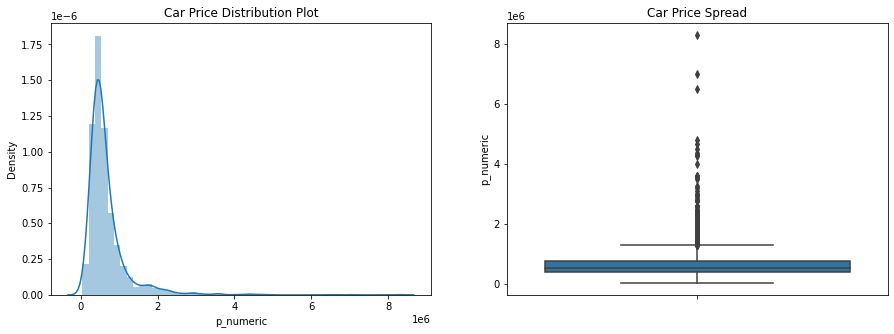

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(encodedDF.p_numeric)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=encodedDF.p_numeric)

plt.show()

## 3.8 Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)


In [ ]:
y=encodedDF['p_numeric']
X=encodedDF.drop(['p_numeric'],axis=1)

## 3.9 Discretize the target variable or perform one-hot encoding on the target or any other as and if required.


As we have price as continuous attribute , we want to predict the price as HIGH,LOW,MEDIUM cars instead of showing the price

In [ ]:
from numpy import percentile

quartiles = percentile(encodedDF['p_numeric'], [25, 50, 75])

print('Minimum price of the car available',encodedDF['p_numeric'].min())
print(f"Three quartiles 25, 50, 75 is :{quartiles} respectively")
print("Maximum price of the car available:",encodedDF['p_numeric'].max())

## We are creating three bins min-25,25-75,75-max
bins = [encodedDF['p_numeric'].min(),quartiles[0], quartiles[2], carsDF['p_numeric'].max()]

##labels to categorize the price
labels=['LOW','MEDIUM','HIGH']
## binning using pandas cut method
encodedDF['PriceCategory'] = pd.cut(encodedDF['p_numeric'],bins=bins, labels=labels, right=False)
##convert this to object type
encodedDF['PriceCategory']=encodedDF['PriceCategory'].astype('object')
##displaying the value counts for low,medium,high
print("price category value counts:\n",encodedDF['PriceCategory'].value_counts())


Minimum price of the car available 40000
Three quartiles 25, 50, 75 is :[380000. 519000. 745250.] respectively
Maximum price of the car available: 8290000
price category value counts:
 MEDIUM    1004
HIGH       499
LOW        496
Name: PriceCategory, dtype: int64


In [ ]:
## we are encoding even PriceCategory attribute as well for building the models,
## we are dropping the p_numeric attribute as we have descretized the price attribute
column='PriceCategory'
print("---Encoding the PriceCategory ffeature-----")
le = LabelEncoder()
column_encoded = le.fit_transform(encodedDF['PriceCategory'])
encodedDF[column]=column_encoded
print(column,encodedDF[column].unique())
print('Dropping the price columns------')
#encodedDF.drop('p_numeric',inplace=True,axis=1)

---Encoding the PriceCategory ffeature-----
PriceCategory [2 0 1 3]
Dropping the price columns------


In [ ]:
encodedDF.shape
#carsDF['city']

(2000, 36)

# 4. Data Exploration using various plots

## 4.1 Scatter plot of each attribute with the target.

Text(0, 0.5, ' width')

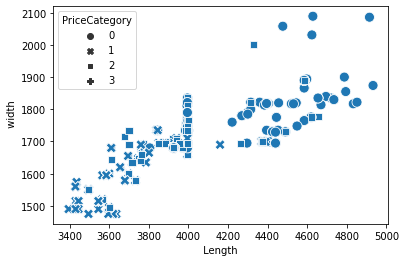

In [ ]:
sns.scatterplot(x="Length",y="Width",s=100,style="PriceCategory",data=encodedDF,palette="deep")
# set x-label
plt.xlabel(" Length ", size=10)
plt.ylabel(" width", size=10)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


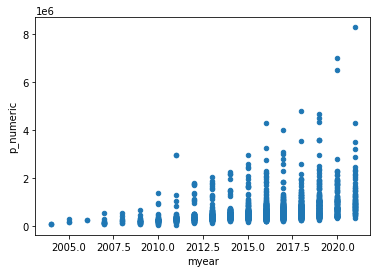

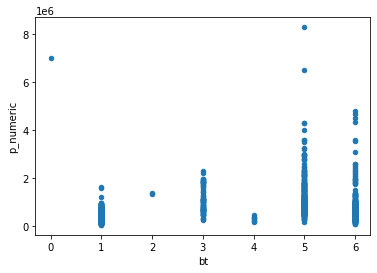

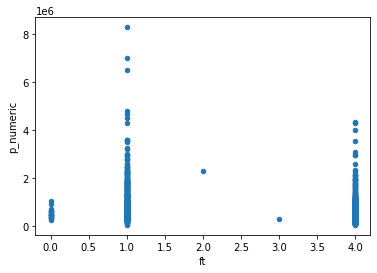

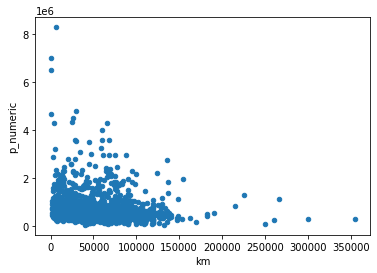

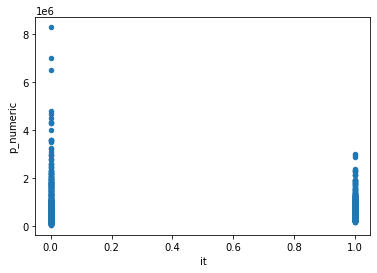

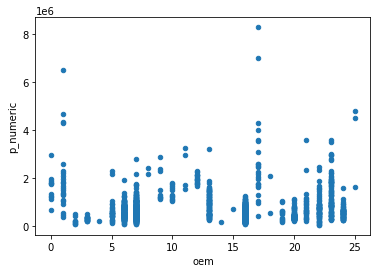

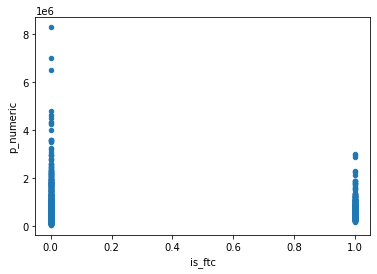

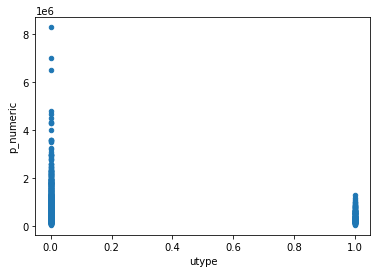

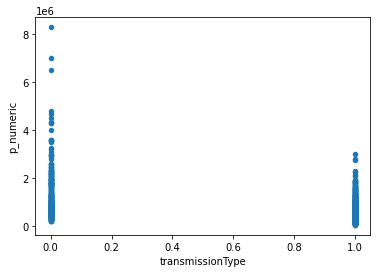

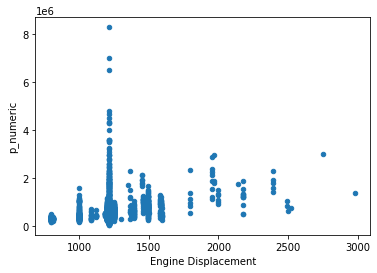

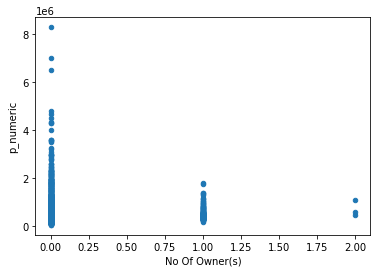

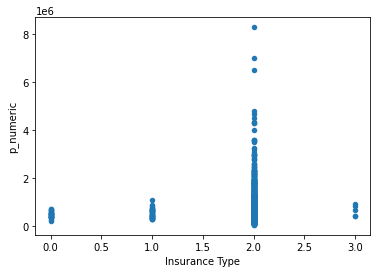

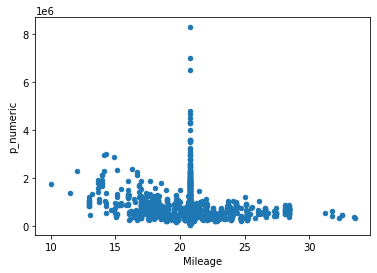

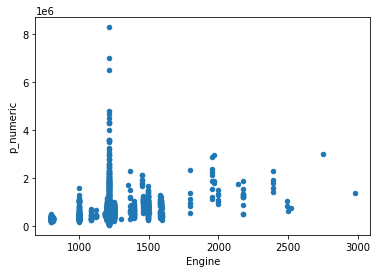

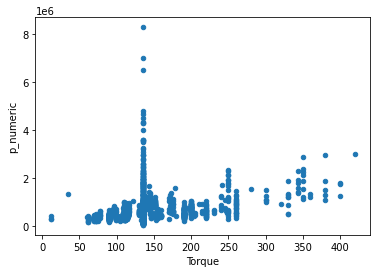

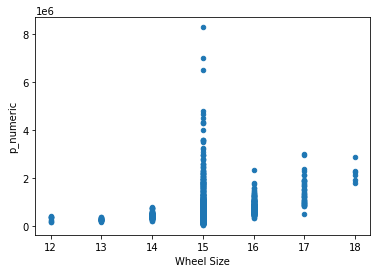

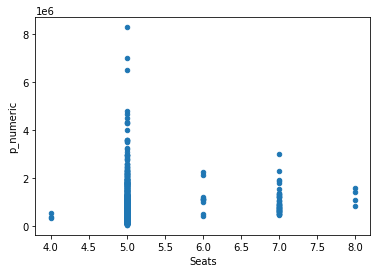

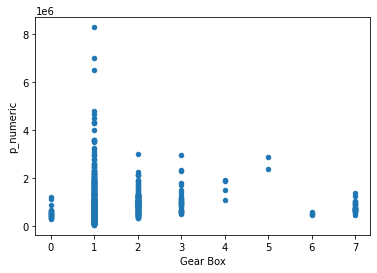

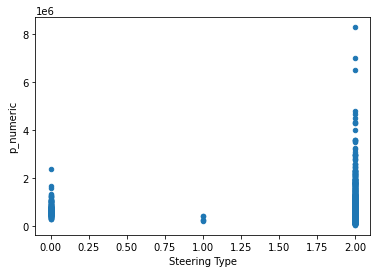

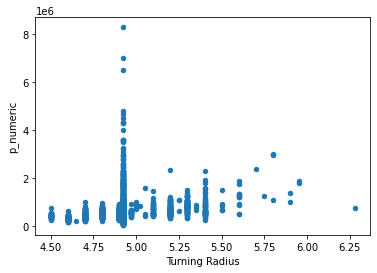

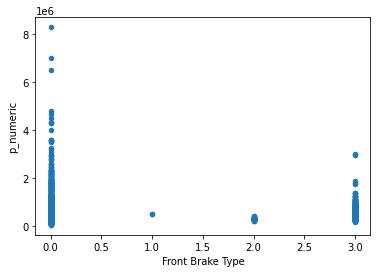

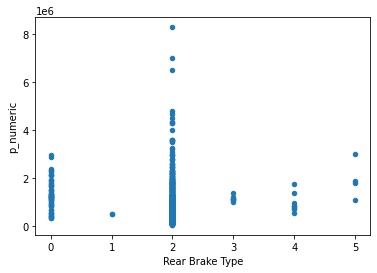

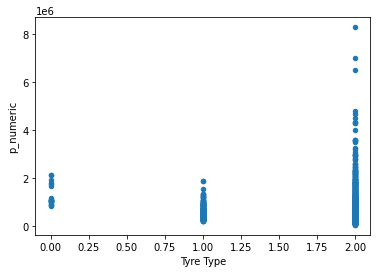

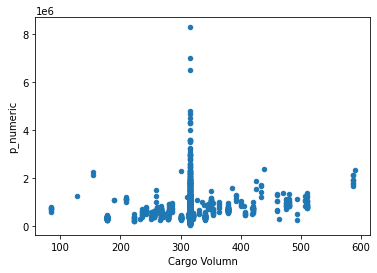

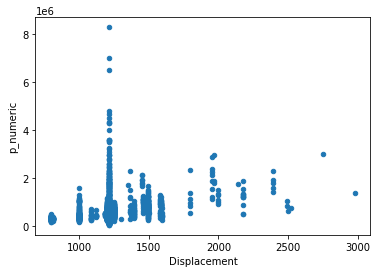

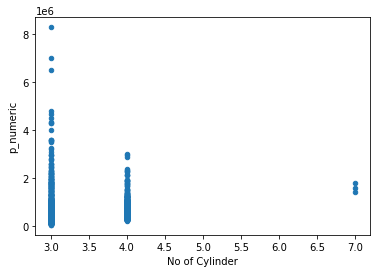

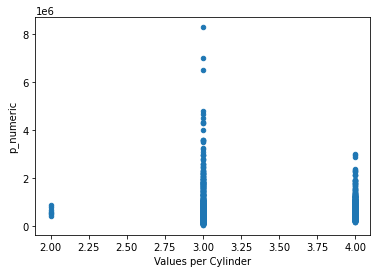

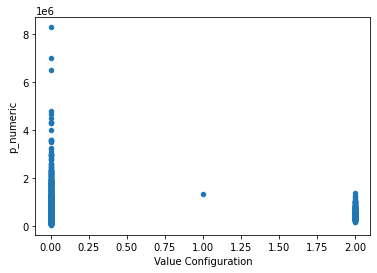

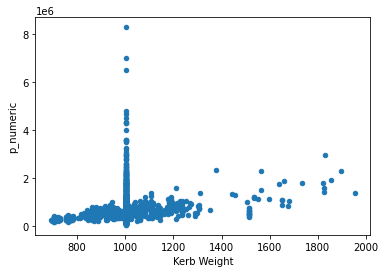

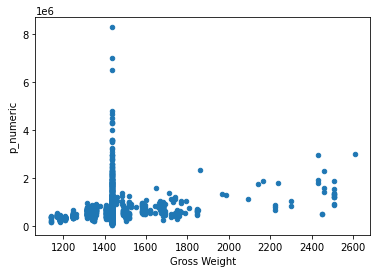

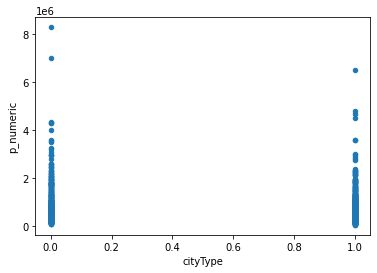

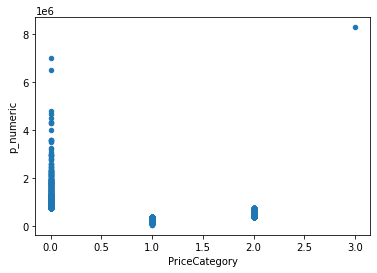

In [ ]:
##Plotting the scatter plot for better understanding of the data
for column in encodedDF.columns:
    if column!="p_numeric":
        encodedDF.plot.scatter(x=column,y="p_numeric")

Observations:
Price has relationship with - Length,Turning Radius,km,myear,width,Kerbweight,Gross Weight,mileage,Displacement,Cargo Volumn,Engine

The other attributes looks to have weak relation

## 4.2 Pair plot of each attribute to identify the linear relationships among the attributes.


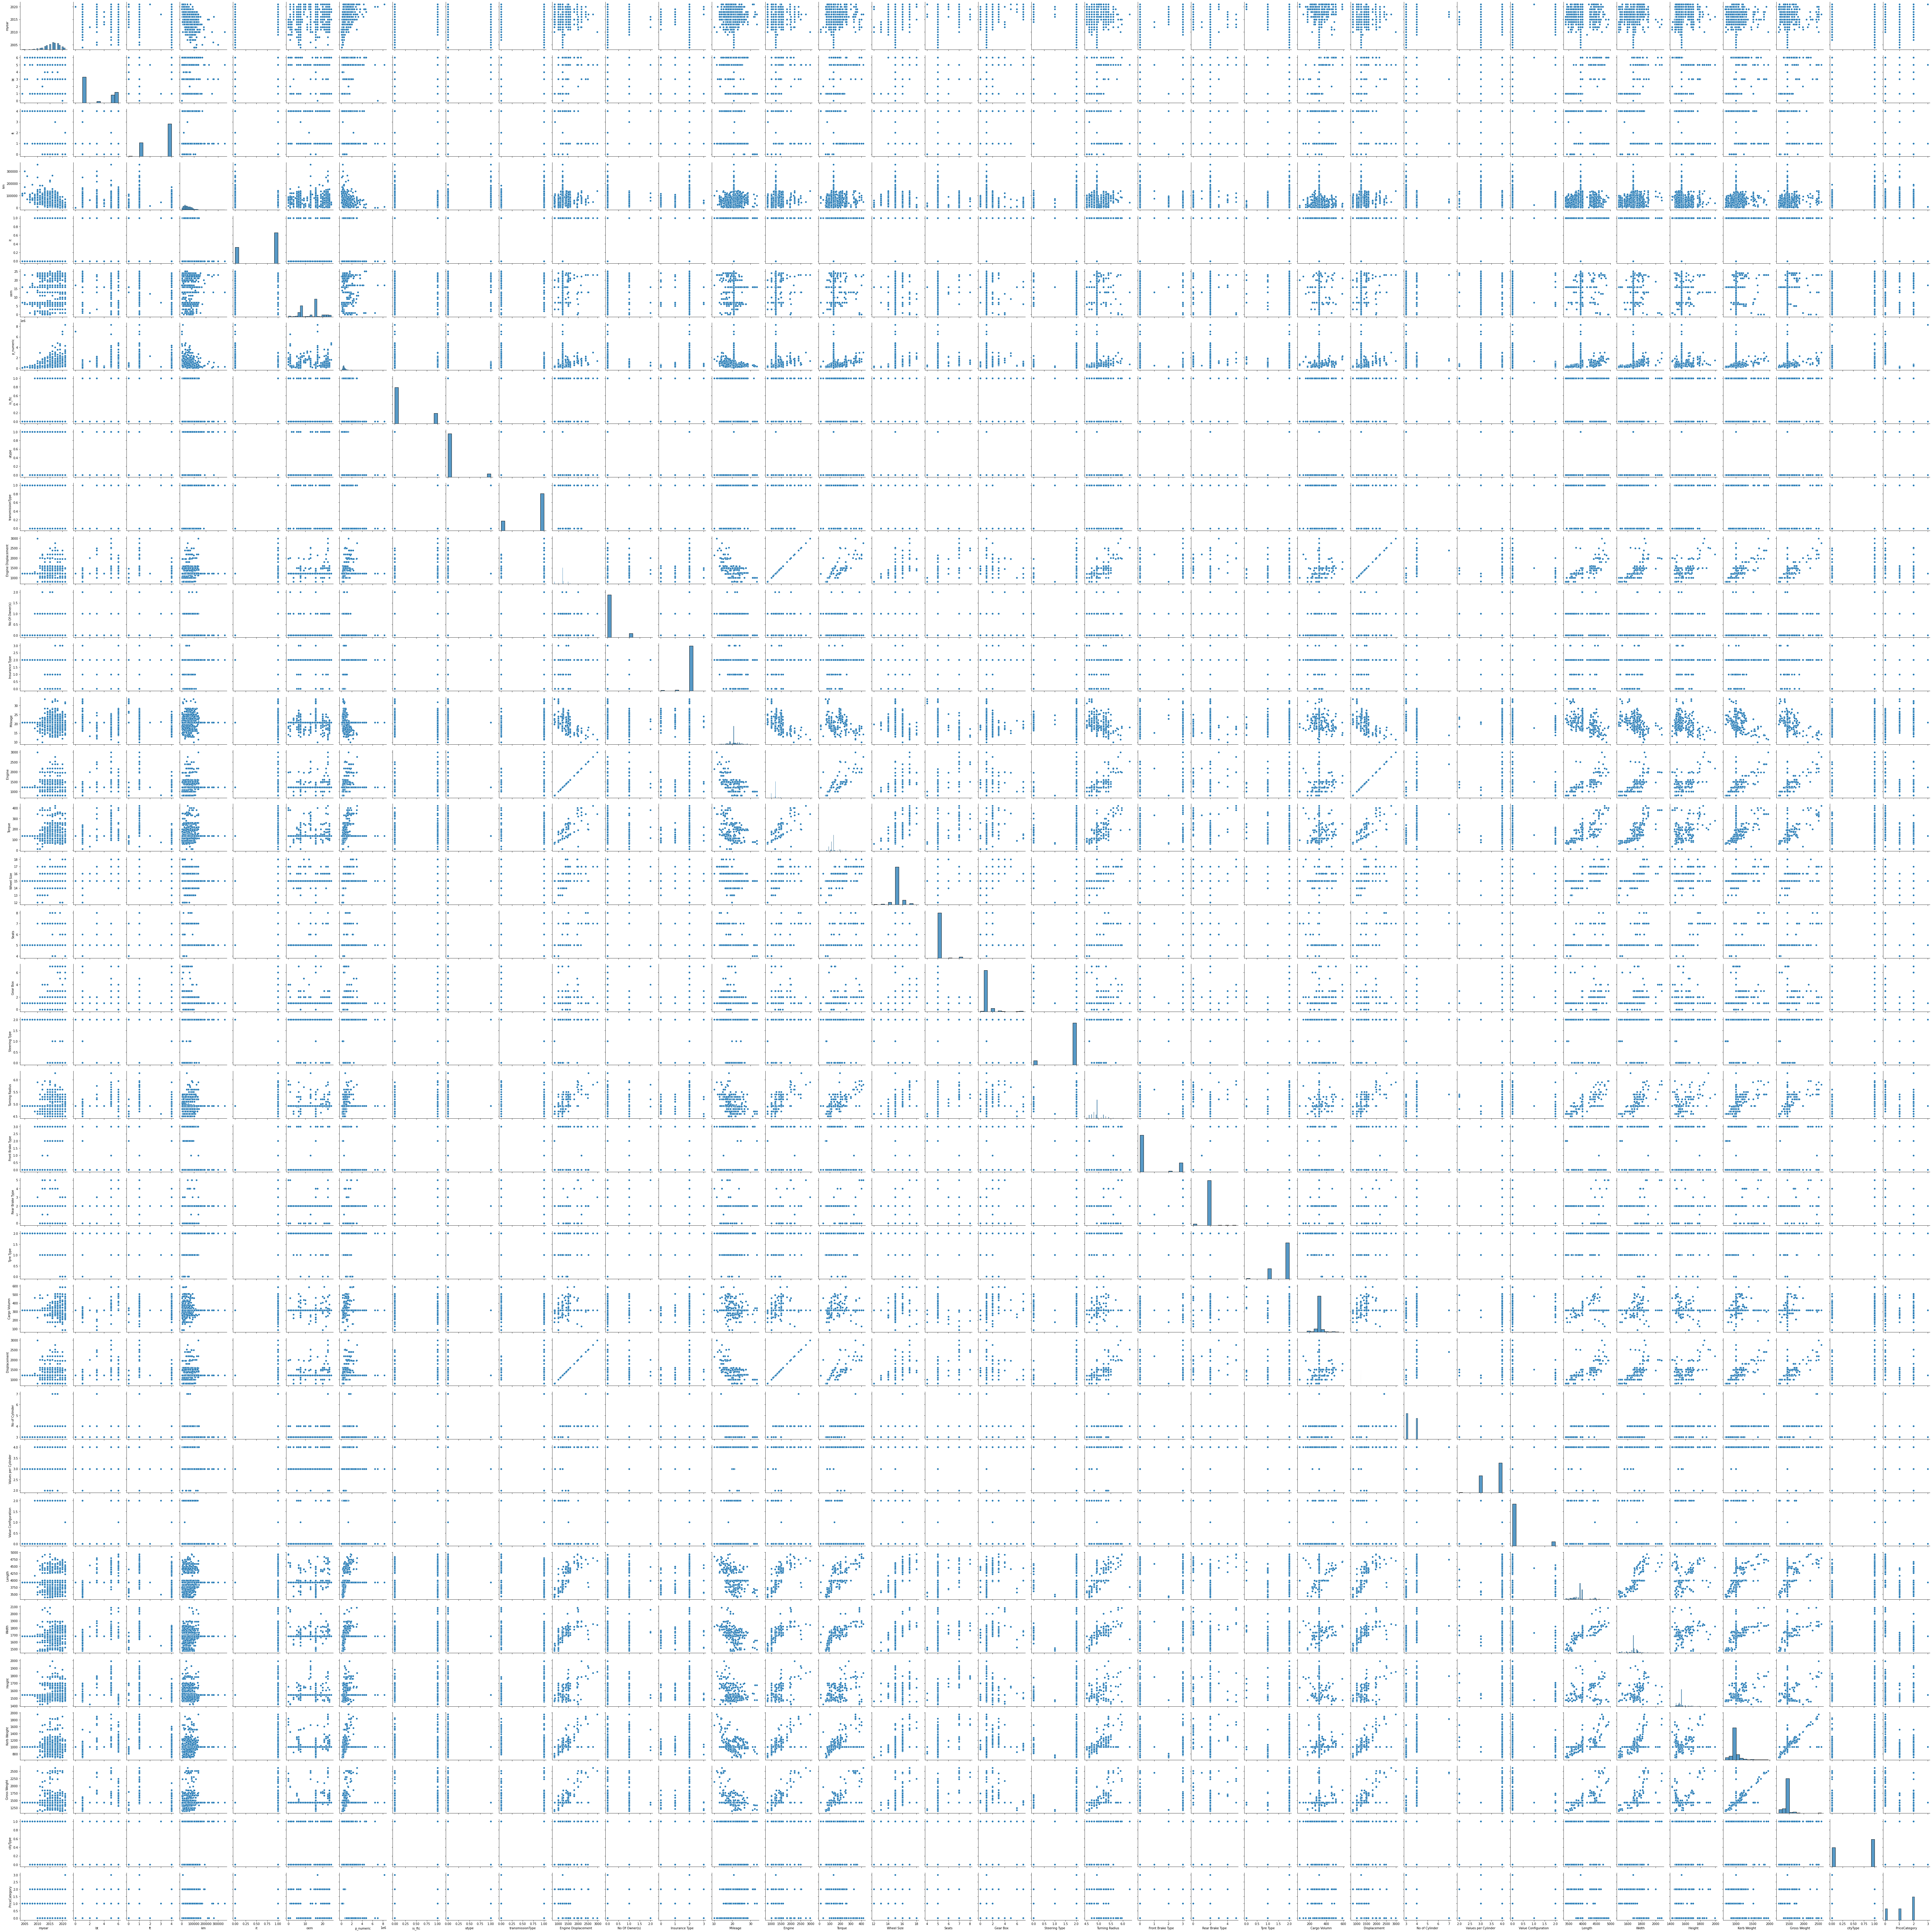

In [ ]:

sns.pairplot(encodedDF)

## 4.3 Regression plots to identify the linear relationship between each attribute with the target variable.


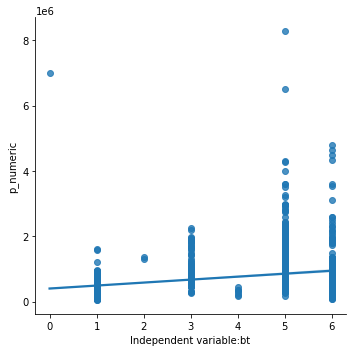

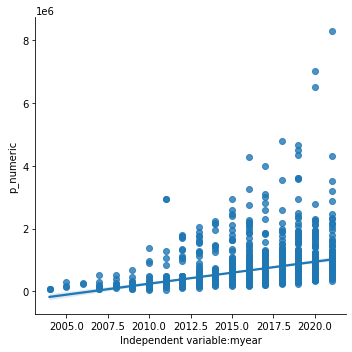

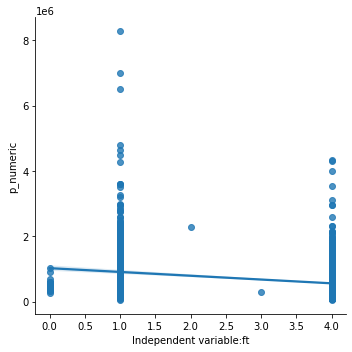

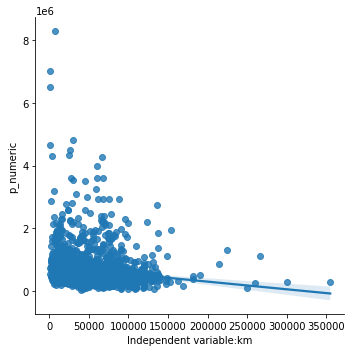

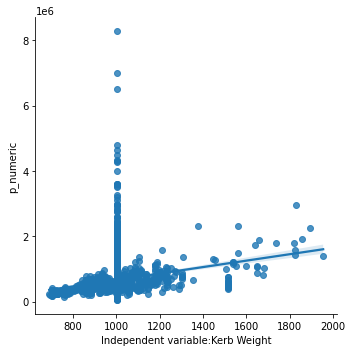

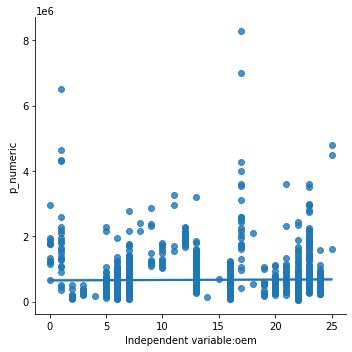

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
columns=['bt','myear','ft','km','Kerb Weight','oem','Length']
for column in columns:
  sns.lmplot(x=column, y="p_numeric", data=encodedDF, order=1)
  plt.ylabel('p_numeric')
  plt.xlabel(f'Independent variable:{column}')


## 4.4 Can any other plot help to identify the optimal set of attributes that can be used for classification. The plot will be based on linear or nonlinear separations. If there is/are such plots, name them, explain why you think they can be helpful in the task and perform the plot as well.


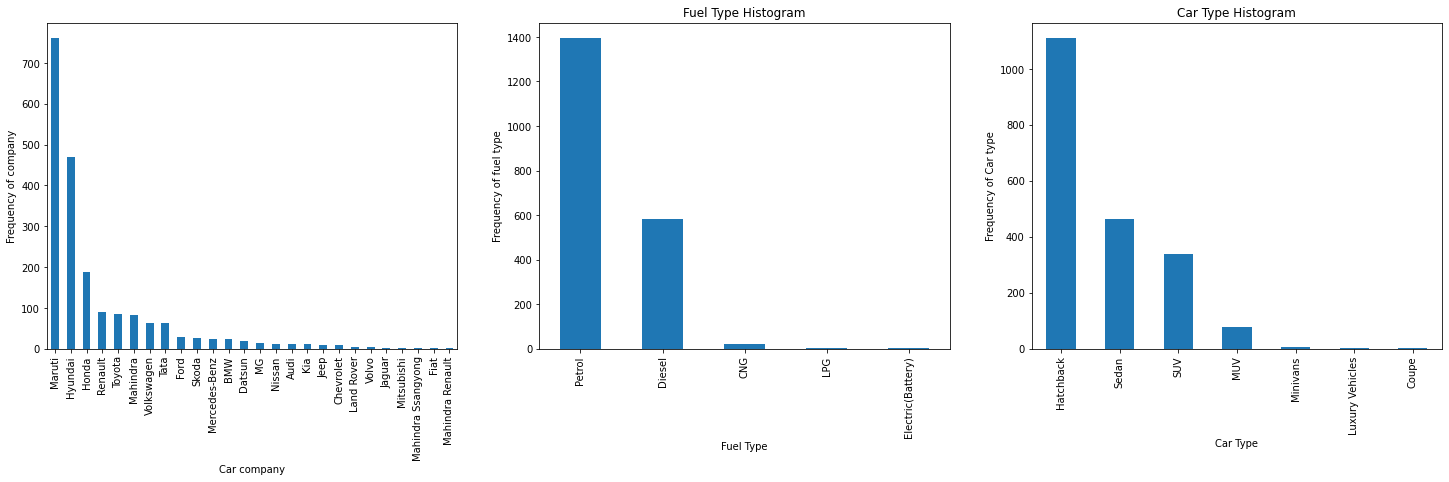

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = carsDF.oem.value_counts().plot(kind='bar')
#plt1.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = carsDF.ft.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = carsDF.bt.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

Inferences:
1) Maruti cars are more in number.
2) Petrol cars are more in number where as LPG cars are very minmum.
3) Hatchback cars are more where as Luxury vehicles are very minimum.

Histogram plots for the attributes:


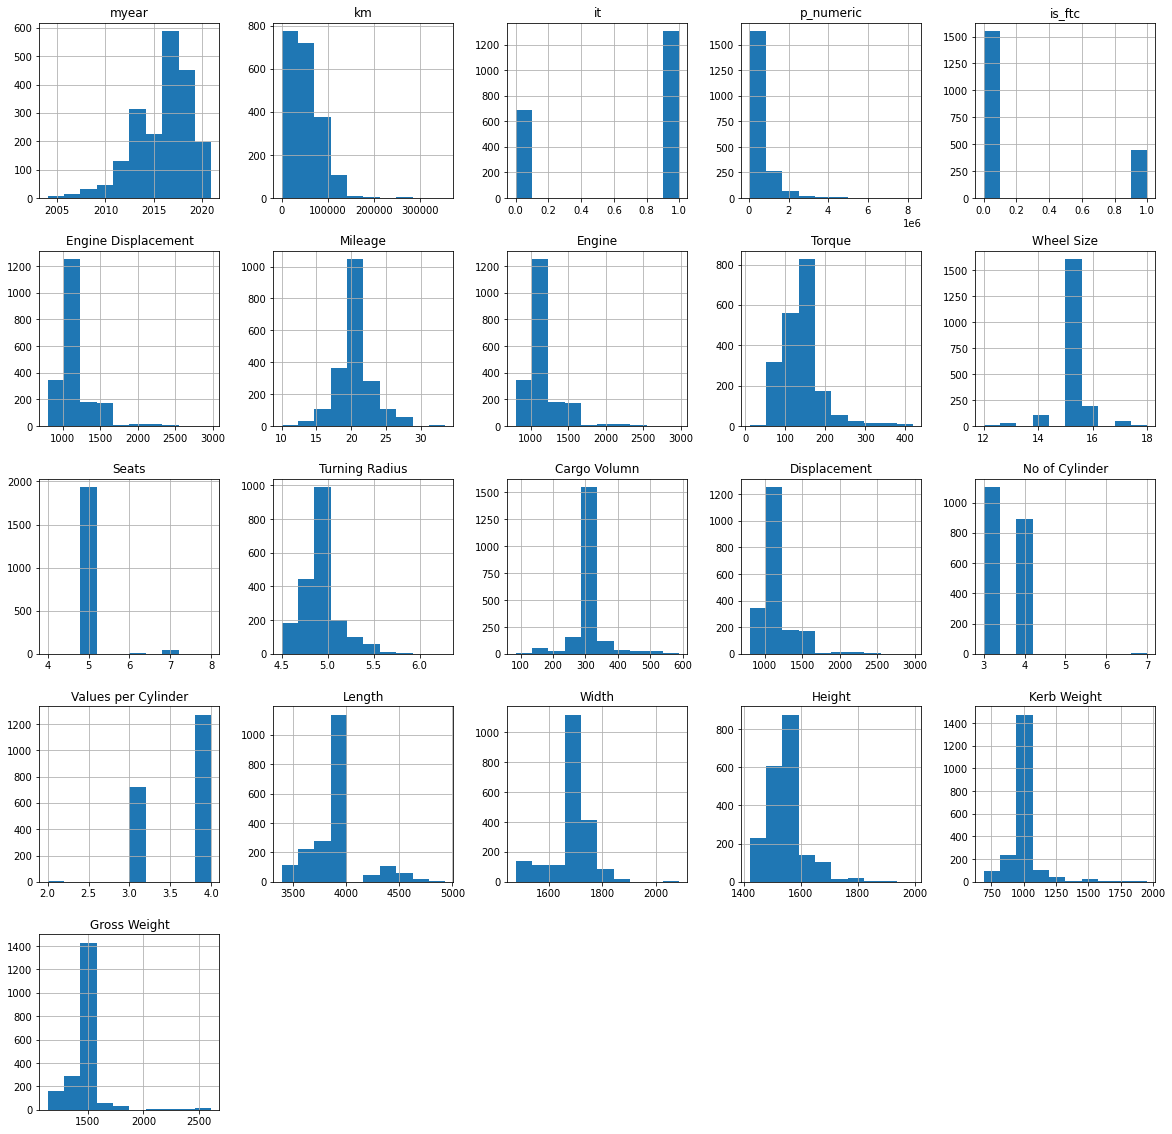

In [ ]:
print("Histogram plots for the attributes:")
hist = carsDF.hist(figsize=[20,20])
plt.show()

# 5. Data Wrangling



## 5.1 Display correlation heatmap of each attribute against the target and report which features are significant.

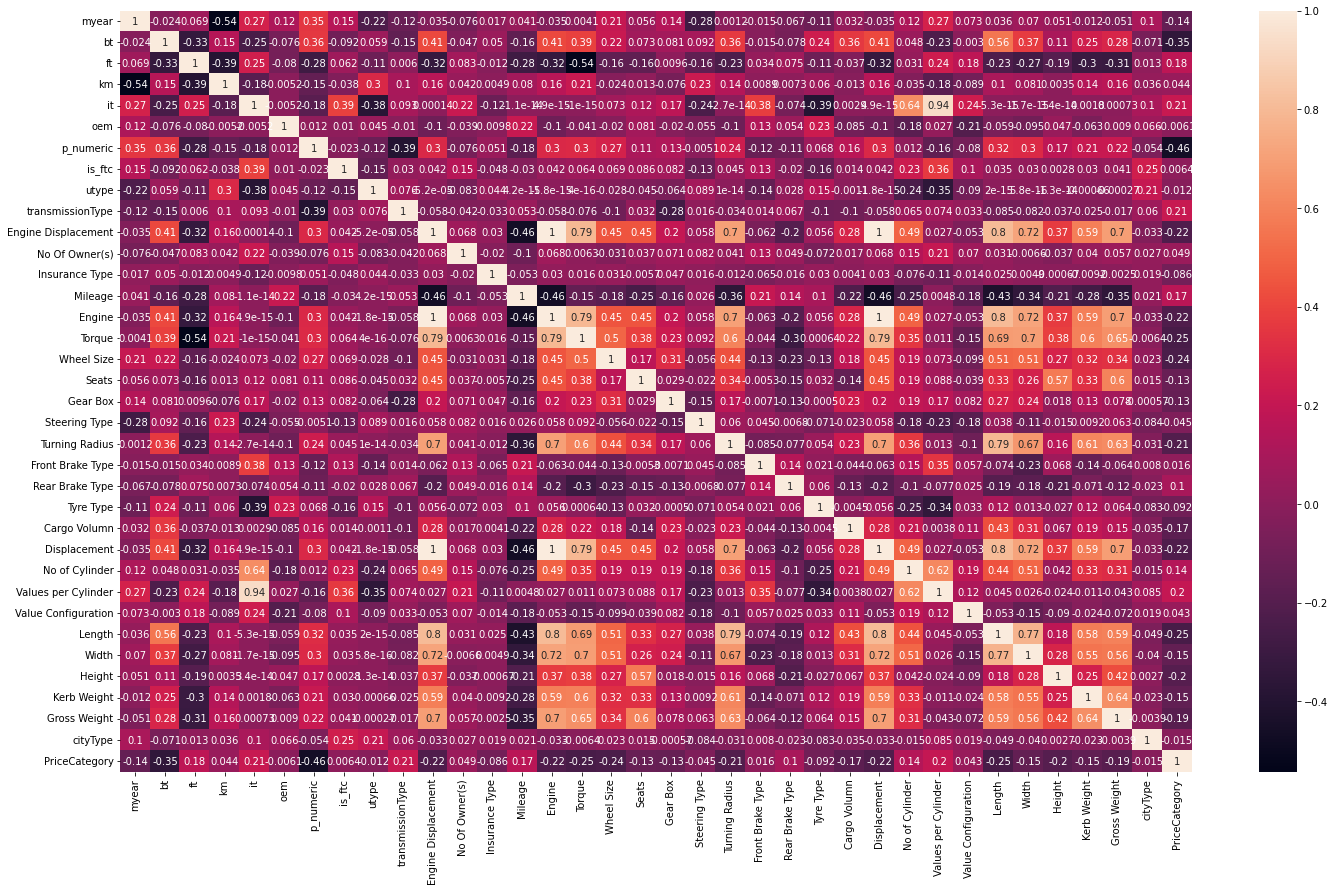

In [ ]:
# correlation between the different parameters
import matplotlib.pyplot as plt
plt.subplots(figsize=(24, 14))
sns.heatmap(encodedDF.corr(),annot=True)
corr=encodedDF.corr()

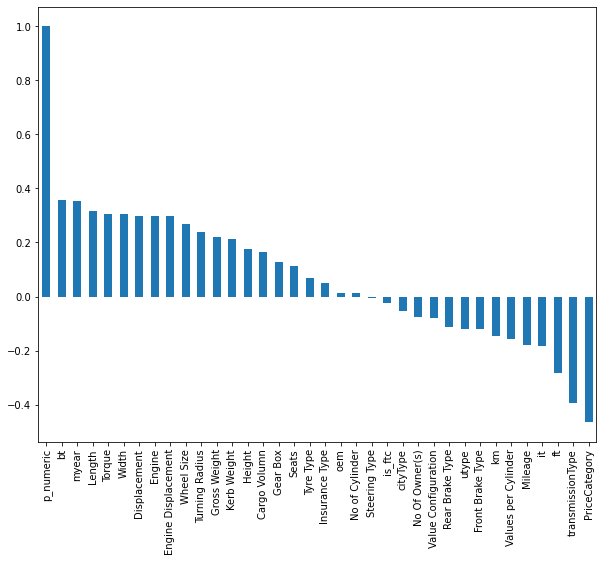

In [ ]:
copDF=carsDF.copy()
dColumns=encodedDF.select_dtypes(exclude='object').columns

plt.figure(figsize=(10,8))
encodedDF.corr()['p_numeric'].sort_values(ascending = False).plot(kind='bar')

We see that some attributes are positively correlated and few are negatively correlated.

In [ ]:
y=encodedDF['p_numeric']
X=encodedDF.drop(['p_numeric','PriceCategory'],axis=1)

## 5.2 Univariate Filters – Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>three</b>)

Write your observations from the results of each method and report the top 5 significant features for each of the above methods. Also plot a graph of significant features for each of them for better visualization.

In [ ]:
def calc_gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    ##calculate the probability of values of attribute
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n )

    gini = 1 - p_sum
    return gini

In [ ]:
##fucntion defines the features to get using gini

def get_imp_features_gini(attribute_name):
    ##get the value counts of the attribute
    attribute_values = encodedDF[attribute_name].value_counts()
    gini_calc = 0
    ##loop through the value
    for key in attribute_values.keys():
        df_k = encodedDF['p_numeric'][encodedDF[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = encodedDF.shape[0]
        ##calculate the gini impurity of the attribute
        gini_calc = gini_calc + (( n_k / n) * calc_gini_impurity(df_k))
    return gini_calc

In [ ]:
# Function to display significant features
def get_imp_features(dataframe, measure_function, top_k):
    y=encodedDF['p_numeric']
    X=encodedDF.drop(['p_numeric','PriceCategory'],axis=1)

    ##using chisquare,mutual information,and gini
    if measure_function == "chi2":
        func = chi2
    elif measure_function == "mutual_info_classif":
        func = mutual_info_classif
    elif measure_function == "gini":
        gini_attiribute ={}
        for column in encodedDF:
            gini_attiribute[column] = get_imp_features_gini(column)
        return gini_attiribute


    #apply SelectKBest class to extract top k best features
    topKfeatures = SelectKBest(score_func=func, k=top_k)
    fit = topKfeatures.fit(X,y)

    dataframeScores = pd.DataFrame(fit.scores_)
    dataframecolumns = pd.DataFrame(X.columns)

    #concat two dataframes for better visualization
    featureScores = pd.concat([dataframecolumns,dataframeScores],axis=1)
    featureScores.columns = ['Features','Score']
    print(featureScores.nlargest(top_k,'Score'))  #print 5 best features

In [ ]:
# Gini Index
gini_attiribute = get_imp_features(encodedDF, 'gini', 5)
gini_attiribute = sorted(gini_attiribute.items(), key=lambda kv:(kv[1], kv[0]))
# Printing Top 5 Features
gini_attiribute

for x in list(reversed(list(gini_attiribute)))[0:5]:
    print (x[0] + "\t" + str(x[1]))

cityType	0.9969022401453089
transmissionType	0.9967414677244254
is_ftc	0.9967139175257733
utype	0.9965088855299424
it	0.9964408088950168


In [ ]:
# Mutual Information Gain
get_imp_features(encodedDF, 'mutual_info_classif', 5)

           Features     Score
21  Rear Brake Type  3.531194
11   Insurance Type  3.221816
17         Gear Box  2.852023
18    Steering Type  2.640220
22        Tyre Type  2.108835


In [ ]:
# Chi Square
get_imp_features(encodedDF, 'chi2', 5)

               Features         Score
3                    km  2.139198e+07
9   Engine Displacement  5.922682e+04
13               Engine  5.922479e+04
24         Displacement  5.922479e+04
14               Torque  2.545561e+04


## 5.3 Train a “DecisionTreeClassifier” on the entire data and use the classifier to extract the top 5 significant features. Plot graph of significant features for better visualization.

In [ ]:
def features_selection_decision_tree_classifier(data, test_size, top_k, show_accuracy=False, show_report=False, show_visual=False):
    #Prepare the independent and dependent attributes sets

    y=encodedDF['p_numeric']
    #encodedDF.drop(['PriceCategory'],inplace=True,axis=1)
    X=encodedDF.drop(['p_numeric','PriceCategory'],axis=1)

    #Split the data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = float(test_size))

    model = DecisionTreeClassifier(random_state=100)
    model.fit(X,y)

    #Use the decision tree for prediction on test data
    y_pred = model.predict(X_test)


    print ("Accuracy : ", accuracy_score(y_test,y_pred)*100, "\n")

    print("Classification Report : \n", classification_report(y_test, y_pred), "\n")


    feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values()
    feature_importances.nlargest(top_k).plot(kind='barh', figsize=(12,8))


    #plot graph of feature importances for better visualization
    print("Feature Importance: ", model.feature_importances_)
    plt.xlabel('Importances')
    plt.ylabel('Features')
    plt.title('Decision Tree Classifier - Feature Labels vs Importances')
    plt.show()


In [ ]:
# Printing Top 5 features by Decision Tree Classifier (30:70)
dt_top5_features =features_selection_decision_tree_classifier(encodedDF, 0.30, 5, True, True, True)

Accuracy :  99.66666666666667 

Classification Report : 
               precision    recall  f1-score   support

       40000       1.00      1.00      1.00         1
       73999       0.00      0.00      0.00         0
       75000       1.00      1.00      1.00         1
       80000       1.00      1.00      1.00         1
       90000       0.00      0.00      0.00         1
       99000       1.00      1.00      1.00         1
      105000       1.00      1.00      1.00         1
      129999       1.00      1.00      1.00         1
      130000       1.00      1.00      1.00         2
      135000       1.00      1.00      1.00         1
      137500       1.00      1.00      1.00         1
      145500       1.00      1.00      1.00         1
      150000       1.00      1.00      1.00         1
      155000       1.00      1.00      1.00         1
      160000       1.00      1.00      1.00         1
      165000       1.00      1.00      1.00         1
      168000       1.00

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

## 5.4 Using "mlxtend" library perform SequentialFeatureSelector to identify top 5 features.

In [ ]:

y=encodedDF['p_numeric']
#encodedDF.drop(['PriceCategory'],inplace=True,axis=1)
X=encodedDF.drop(['p_numeric','PriceCategory'],axis=1)



#Prepare a model using the specified feature selection method
sfs_model = SFS(DecisionTreeClassifier(),
                k_features=5,
                forward=False,
                floating=False,
                verbose=2,
                scoring='accuracy',
                cv=0)

#Lets fit the model and identify the features
sfs_model = sfs_model.fit(X, y)

#Show outcomes

print("Score : " , sfs_model.k_score_, "\n")
print("Top 5 Feature Names : " , sfs_model.k_feature_names_, "\n")



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    5.7s finished

[2022-02-27 09:40:55] Features: 33/5 -- score: 0.9985[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    5.4s finished

[2022-02-27 09:41:00] Features: 32/5 -- score: 0.9985[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    4.9s finished

[2022-02-27 09:41:05] Features: 31/5 -- score: 0.9985[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s rem

Score :  0.997 

Top 5 Feature Names :  ('myear', 'bt', 'ft', 'km', 'oem') 



[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s finished

[2022-02-27 09:42:04] Features: 5/5 -- score: 0.997

## 5.5 Conclude the top 3 significant features with necessary justifications.

As our problem statement is to conclude which parameters have been considered to which parameters are effecting to take decision on the price of the used cars:

> It is been observed that


1.    myear - Model year
        if model year is very old year then as price of the car reduces with the current year
2.    bt- build type of the car
      Based on body type of the car like Hatchback,SUV the price of the car varies
3.    km-kms driven -based on the Kilometers drove by the car will reduce the price of the car


These are the parameters affects the used cars price.